In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as mno
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
from itertools import cycle

In [2]:
# set the date column as the index
# index column gives each row a unique identifier
weather = pd.read_csv("JFK Station.csv", index_col = "DATE")

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,28,22,NaN,330.0,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,22,NaN,290.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,NaN,38,25,NaN,310.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,23,NaN,300.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,35,21,NaN,270.0,NaN,NaN,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.74,NaN,NaN,0.00,0.0,0.0,30.0,35,28,NaN,NaN,270.0,270.0,NaN,NaN,NaN,NaN,16.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.50,NaN,NaN,0.00,0.0,0.0,36.0,45,27,NaN,NaN,230.0,200.0,NaN,NaN,NaN,NaN,14.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,7.16,NaN,NaN,0.00,0.0,0.0,39.0,46,32,NaN,NaN,230.0,230.0,NaN,NaN,NaN,NaN,15.0,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.shape

(19358, 44)

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19358 entries, 1970-01-01 to 2022-12-31
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19358 non-null  object 
 1   NAME     19358 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14242 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19358 non-null  float64
 8   SNOW     19358 non-null  float64
 9   SNWD     19357 non-null  float64
 10  TAVG     6235 non-null   float64
 11  TMAX     19358 non-null  int64  
 12  TMIN     19358 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9740 non-null   float64
 16  WDF5     9657 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [6]:
weather.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
count,9615.000000,9616.000000,14242.000000,10124.000000,12269.000000,19358.000000,19358.000000,19357.000000,6235.000000,19358.000000,19358.000000,31.000000,9611.000000,9740.000000,9657.000000,5121.000000,1.0,6071.000000,9614.000000,9740.000000,9656.000000,7463.000000,1.0,7157.0,1257.0,1287.0,337.0,364.0,181.0,108.0,3921.0,140.0,14.0,2185.0,887.0,42.0,6577.0,60.0,1167.0,5.0,49.0,1.0
mean,57.886635,60.665557,11.237993,1438.505828,1383.881245,0.117751,0.064433,0.208865,55.445389,61.786910,47.502428,160.064516,212.060139,215.471253,215.176556,230.659832,360.0,0.050338,18.729436,22.048789,27.189147,25.545384,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,30.612050,33.353307,4.793856,758.281872,631.337736,0.330525,0.597869,1.270538,16.550058,17.402685,16.412647,626.175797,100.481364,97.398093,98.817325,95.287299,NaN,0.279142,5.764950,7.351804,8.842924,8.034343,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,-2.000000,0.000000,10.000000,10.000000,0.000000,23.000000,360.0,0.000000,6.000000,6.900000,0.000000,8.100000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,30.000000,30.000000,8.280000,1101.750000,1023.000000,0.000000,0.000000,0.000000,42.000000,48.000000,35.000000,0.000000,160.000000,160.000000,160.000000,180.000000,360.0,0.000000,15.000000,17.000000,21.000000,19.500000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,60.000000,70.000000,10.510000,1526.000000,1458.000000,0.000000,0.000000,0.000000,56.000000,62.000000,47.000000,0.000000,210.000000,210.000000,210.000000,225.000000,360.0,0.000000,17.000000,21.000000,25.900000,24.200000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,80.000000,90.000000,13.420000,1850.000000,1837.000000,0.040000,0.000000,0.000000,70.000000,77.000000,62.000000,0.000000,300.000000,310.000000,310.000000,315.000000,360.0,0.000000,21.900000,25.900000,32.000000,30.000000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,100.000000,100.000000,308.030000,32767.000000,2359.000000,7.800000,30.300000,28.000000,91.000000,103.000000,82.000000,2832.000000,360.000000,360.000000,360.000000,360.000000,360.0,6.400000,46.100000,314.100000,214.100000,71.400000,8.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
null_percentage=pd.DataFrame(weather[weather.columns[weather.isnull().any()]].isnull().sum()*100/weather.shape[0], columns =["Percentage of null values"])
null_percentage["Total NaN values"]=weather[weather.columns[weather.isnull().any()]].isnull().sum()

In [8]:
weather.shape[0]


19358

In [9]:
null_percentage

,Percentage of null values,Total NaN values
ACMH,50.330613,9743
ACSH,50.325447,9742
AWND,26.428350,5116
FMTM,47.701209,9234
PGTM,36.620519,7089
SNWD,0.005166,1
TAVG,67.791094,13123
TSUN,99.839859,19327
WDF1,50.351276,9747
WDF2,49.684885,9618


In [10]:
null_cols = null_percentage.index.tolist()
print(null_cols)

['ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'SNWD', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01']


<AxesSubplot:>

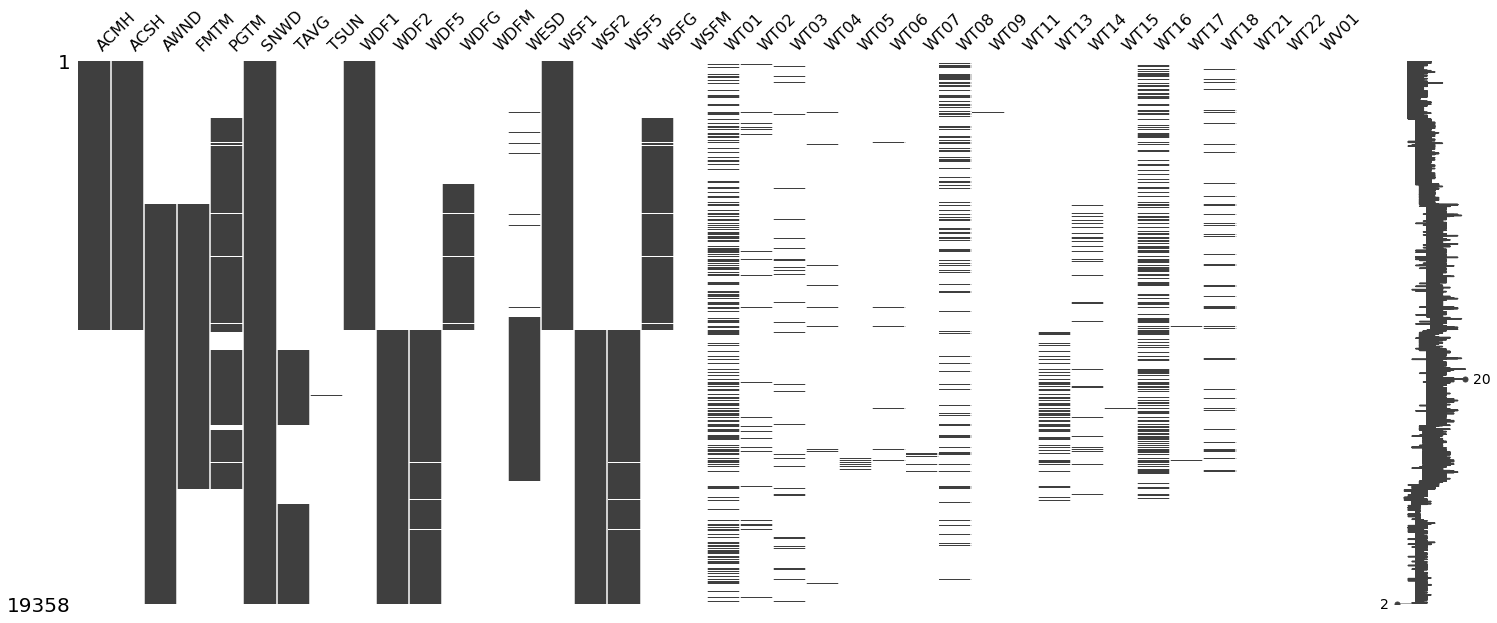

In [11]:
mno.matrix(weather[null_cols])

In [12]:
weatherdf = weather.copy()
weatherdf.columns = map(str.lower, weatherdf.columns)

In [13]:
weatherdf.head()

,station,name,acmh,acsh,awnd,fmtm,pgtm,prcp,snow,snwd,tavg,tmax,tmin,tsun,wdf1,wdf2,wdf5,wdfg,wdfm,wesd,wsf1,wsf2,wsf5,wsfg,wsfm,wt01,wt02,wt03,wt04,wt05,wt06,wt07,wt08,wt09,wt11,wt13,wt14,wt15,wt16,wt17,wt18,wt21,wt22,wv01
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,28,22,NaN,330.0,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,22,NaN,290.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,NaN,38,25,NaN,310.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,23,NaN,300.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,35,21,NaN,270.0,NaN,NaN,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
weatherdf.dtypes

station     object
name        object
acmh       float64
acsh       float64
awnd       float64
fmtm       float64
pgtm       float64
prcp       float64
snow       float64
snwd       float64
tavg       float64
tmax         int64
tmin         int64
tsun       float64
wdf1       float64
wdf2       float64
wdf5       float64
wdfg       float64
wdfm       float64
wesd       float64
wsf1       float64
wsf2       float64
wsf5       float64
wsfg       float64
wsfm       float64
wt01       float64
wt02       float64
wt03       float64
wt04       float64
wt05       float64
wt06       float64
wt07       float64
wt08       float64
wt09       float64
wt11       float64
wt13       float64
wt14       float64
wt15       float64
wt16       float64
wt17       float64
wt18       float64
wt21       float64
wt22       float64
wv01       float64
dtype: object

In [15]:
weatherdf.index = pd.to_datetime(weatherdf.index)
weatherdf.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=19358, freq=None)

In [16]:
# subset the years 
weatherdf.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=19358)

In [17]:
# check whether columns have 9999s
weatherdf.apply(lambda x: (x==9999).sum())

station    0
name       0
acmh       0
acsh       0
awnd       0
fmtm       2
pgtm       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
tsun       0
wdf1       0
wdf2       0
wdf5       0
wdfg       0
wdfm       0
wesd       0
wsf1       0
wsf2       0
wsf5       0
wsfg       0
wsfm       0
wt01       0
wt02       0
wt03       0
wt04       0
wt05       0
wt06       0
wt07       0
wt08       0
wt09       0
wt11       0
wt13       0
wt14       0
wt15       0
wt16       0
wt17       0
wt18       0
wt21       0
wt22       0
wv01       0
dtype: int64

In [18]:
mydf = weatherdf.iloc[:,2:]
mydf.head()

,acmh,acsh,awnd,fmtm,pgtm,prcp,snow,snwd,tavg,tmax,tmin,tsun,wdf1,wdf2,wdf5,wdfg,wdfm,wesd,wsf1,wsf2,wsf5,wsfg,wsfm,wt01,wt02,wt03,wt04,wt05,wt06,wt07,wt08,wt09,wt11,wt13,wt14,wt15,wt16,wt17,wt18,wt21,wt22,wv01
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,28,22,NaN,330.0,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,22,NaN,290.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,NaN,38,25,NaN,310.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,31,23,NaN,300.0,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,NaN,35,21,NaN,270.0,NaN,NaN,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = mydf.copy()

In [20]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

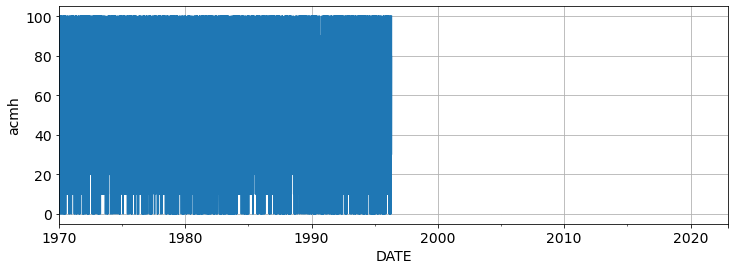

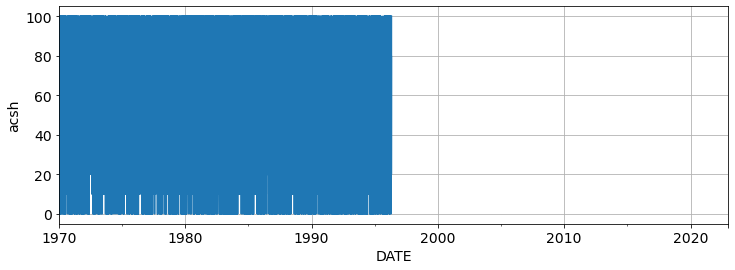

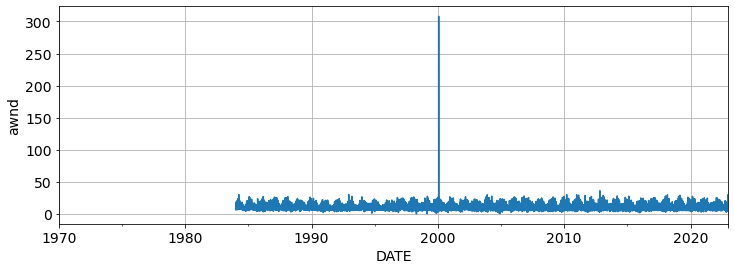

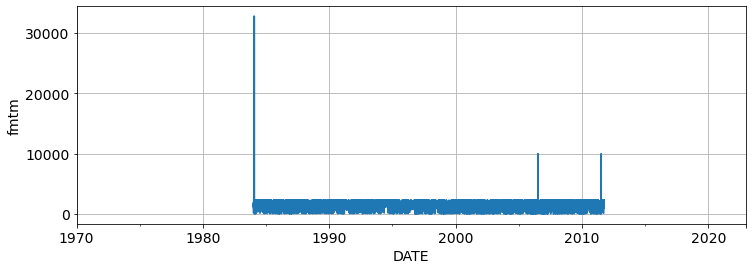

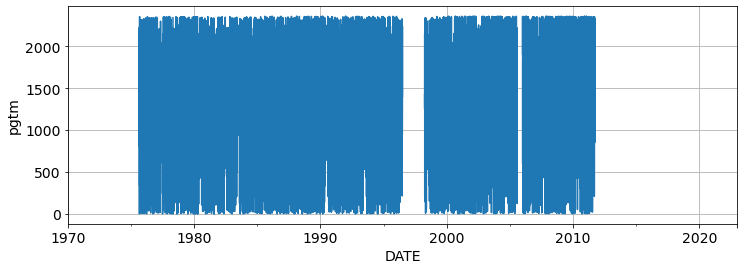

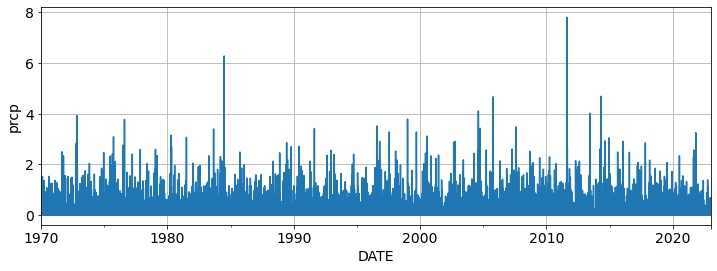

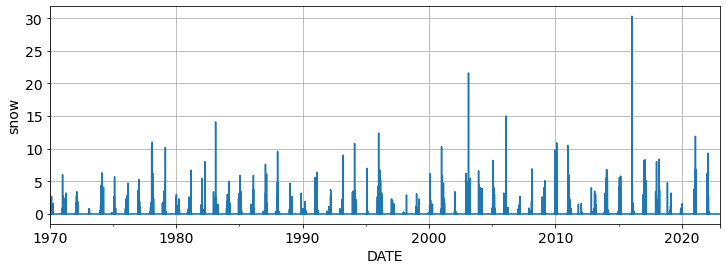

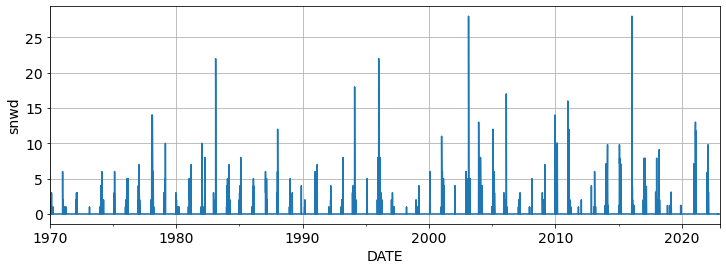

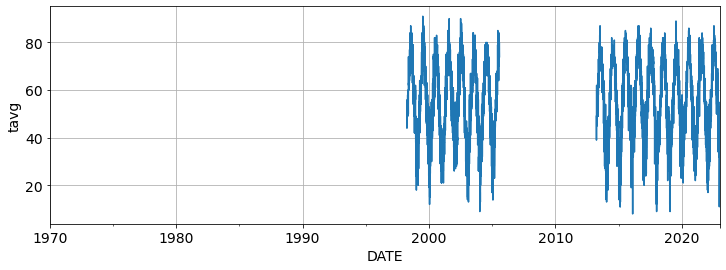

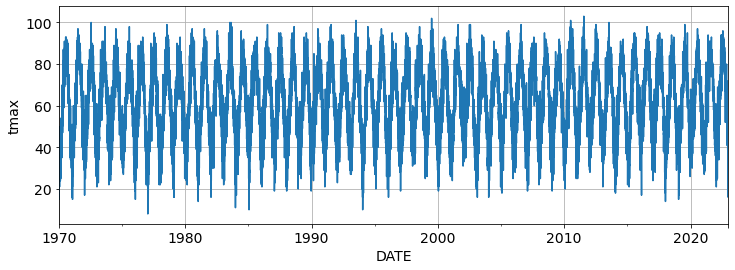

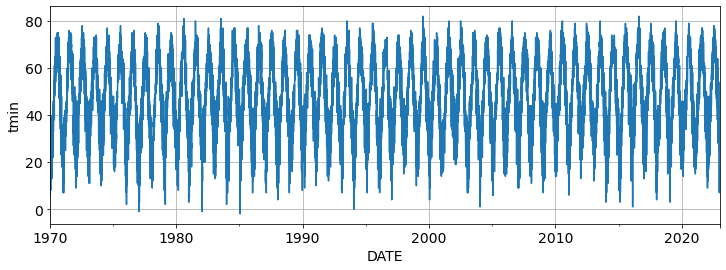

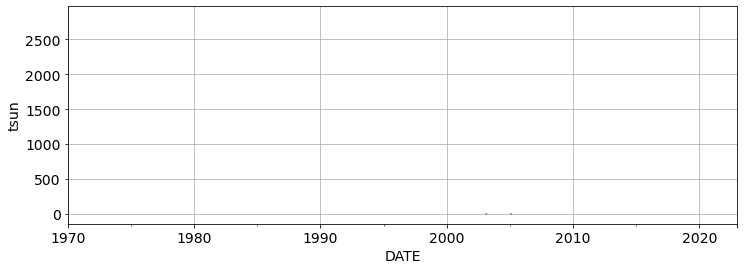

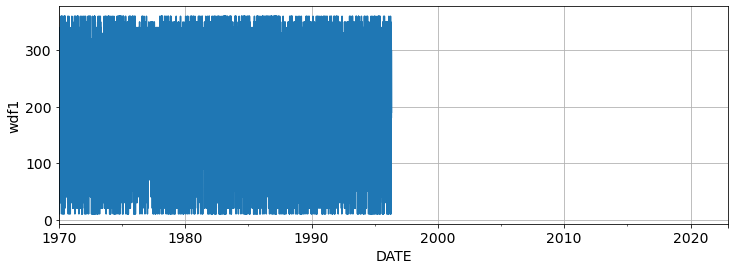

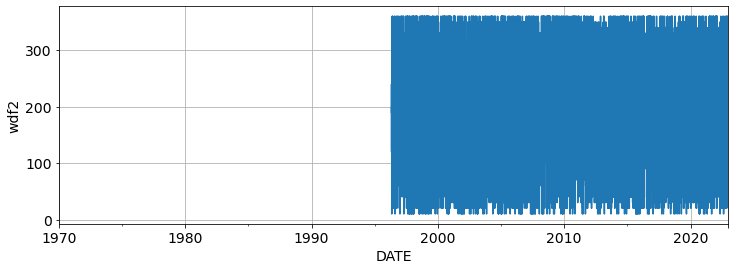

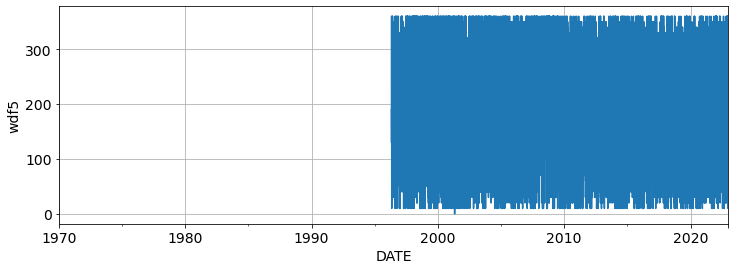

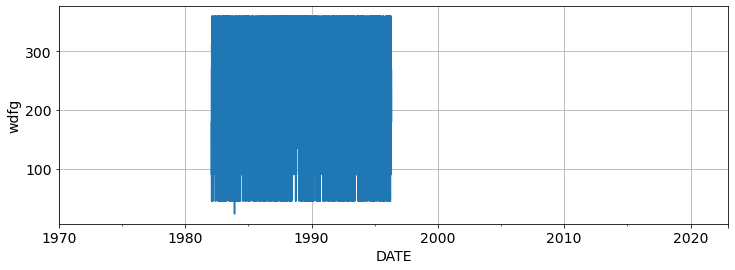

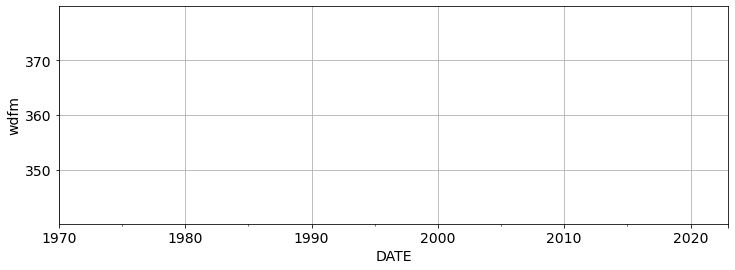

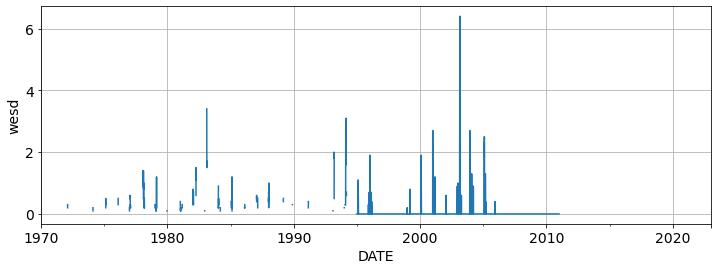

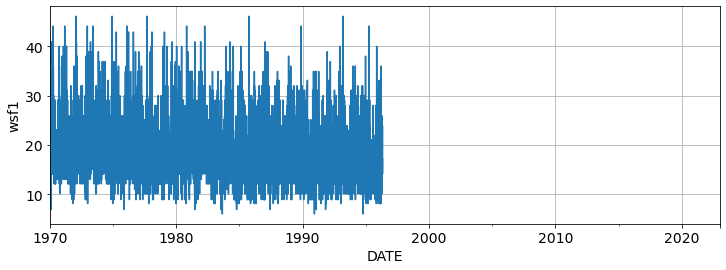

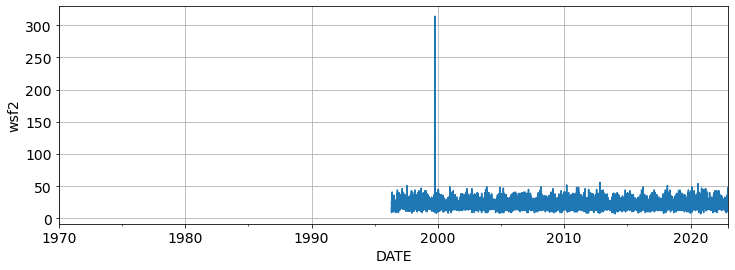

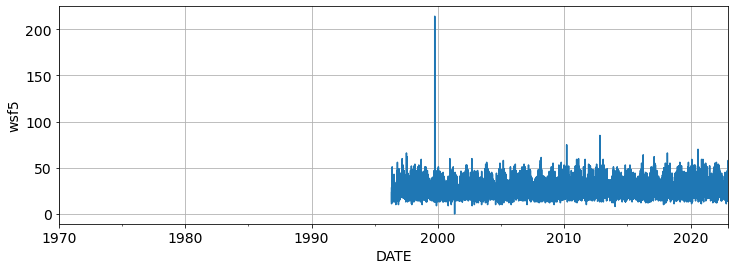

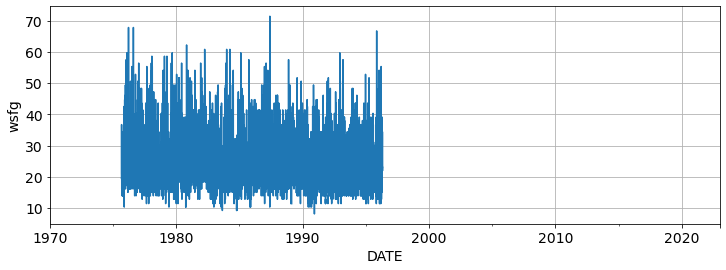

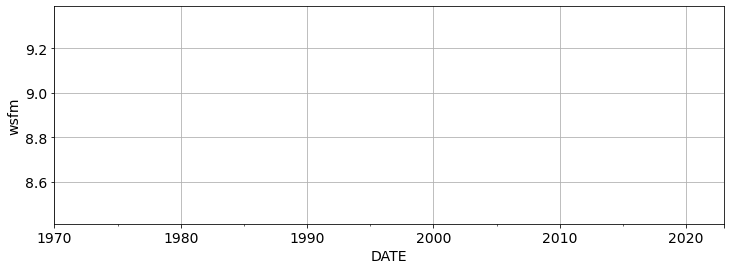

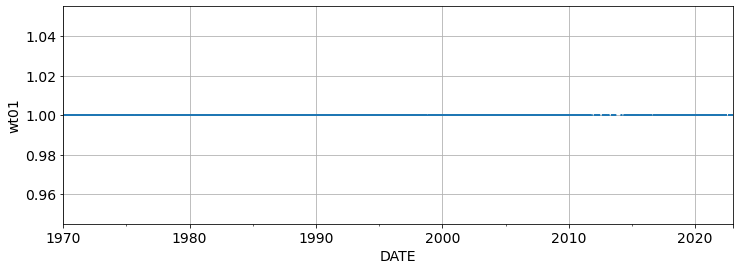

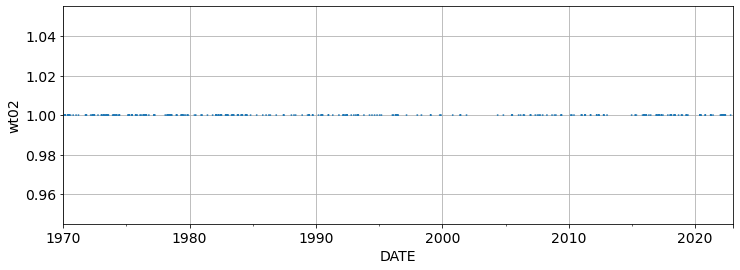

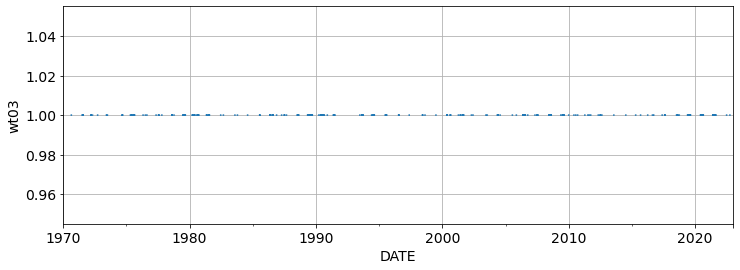

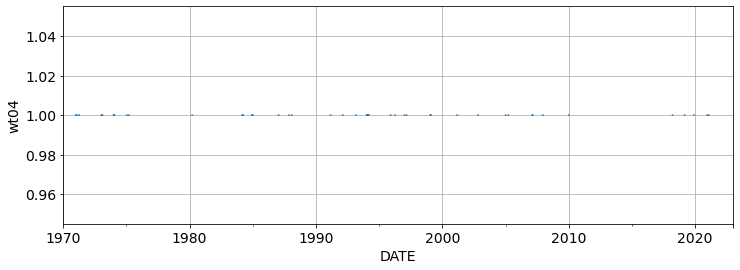

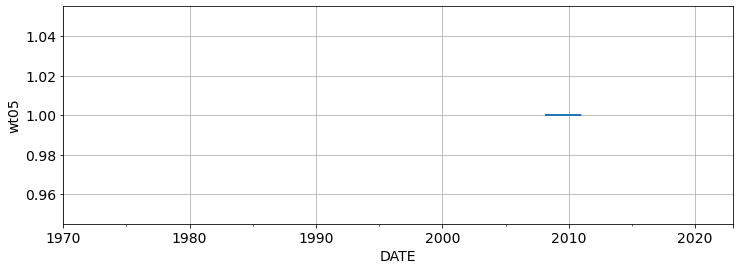

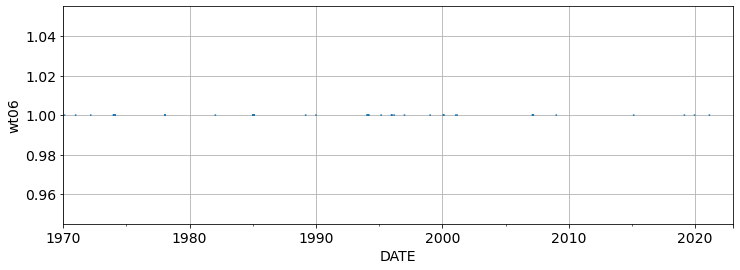

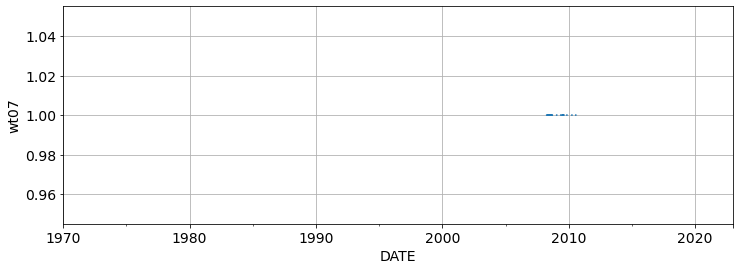

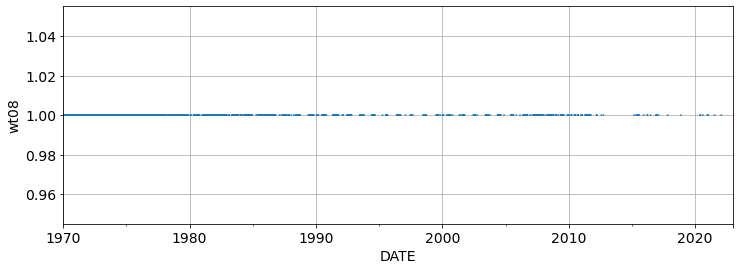

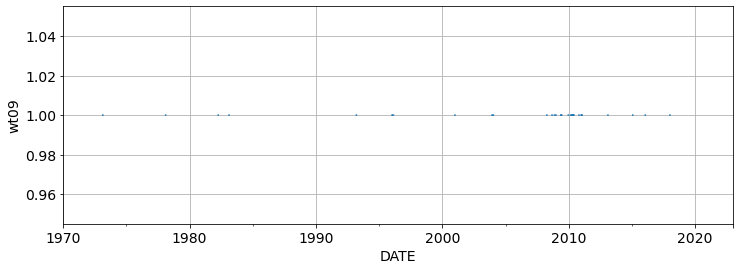

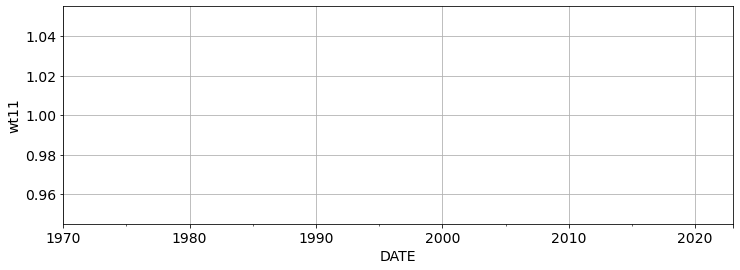

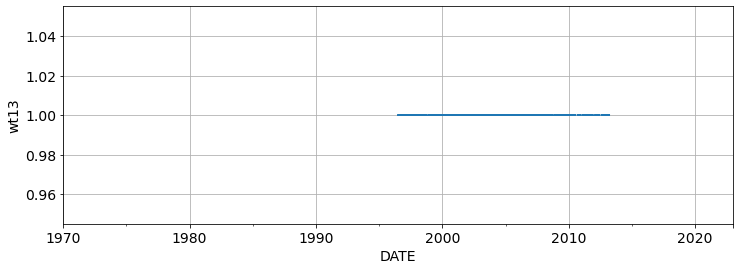

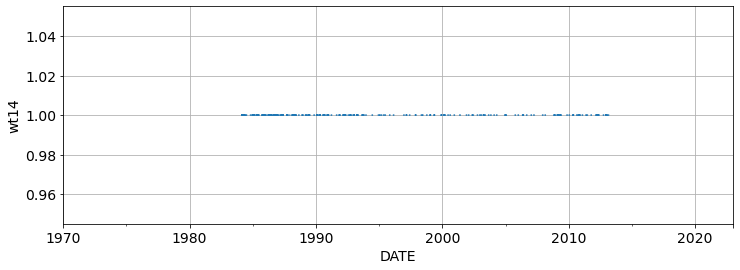

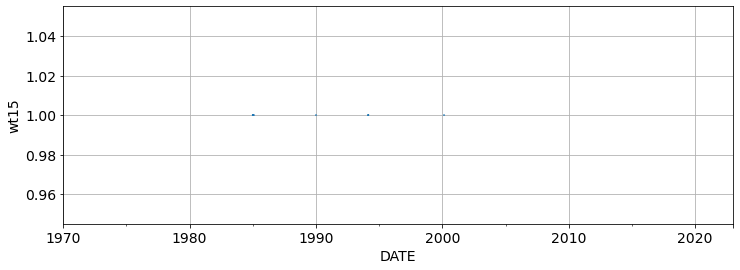

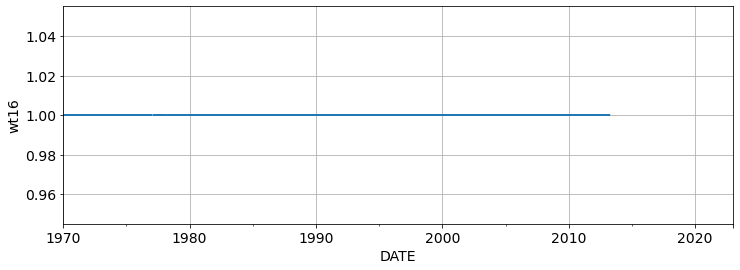

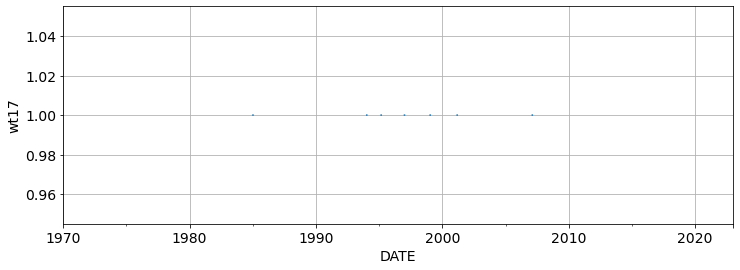

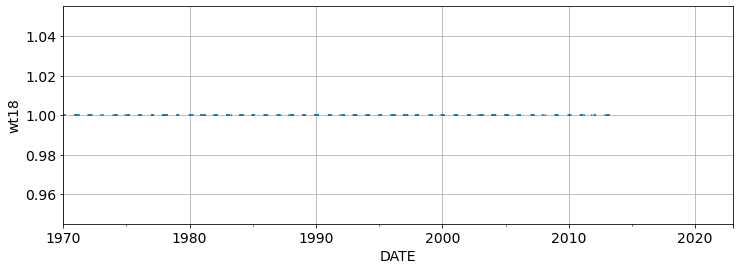

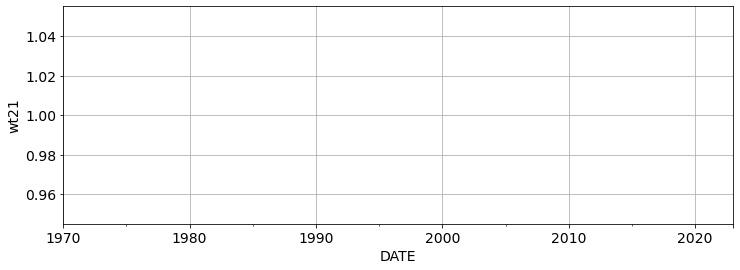

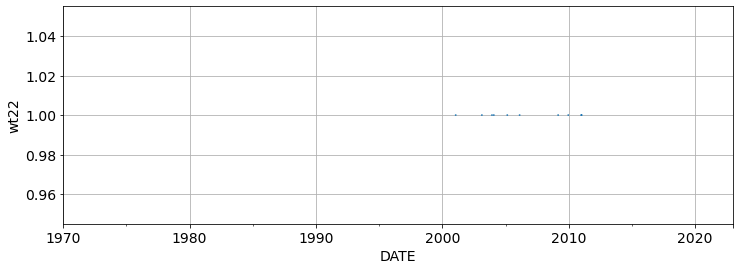

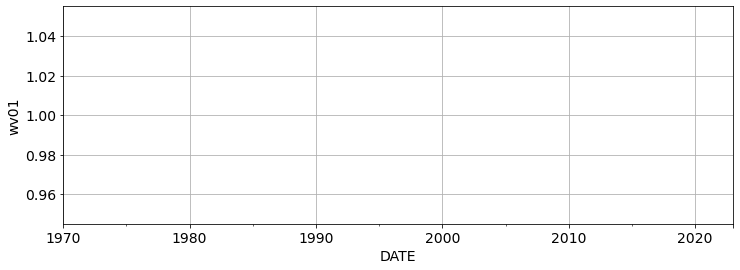

In [21]:
for column in df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    df[column].plot()
    plt.show()

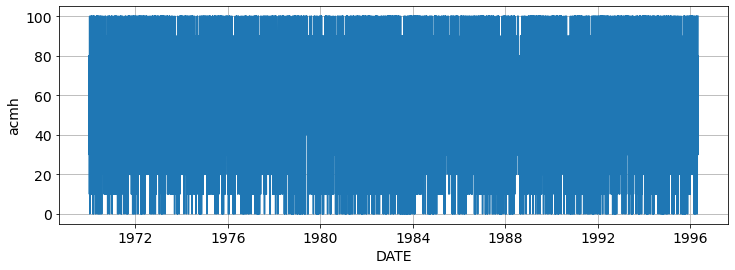

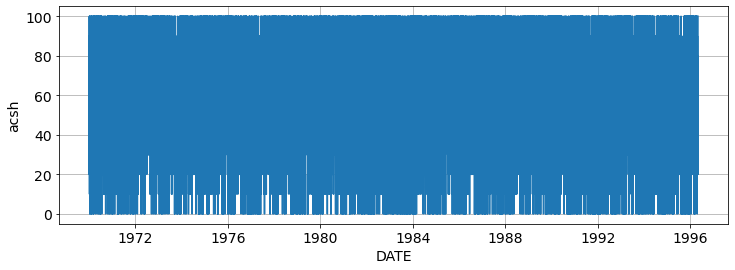

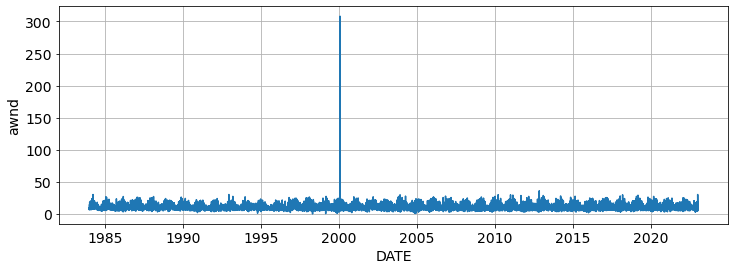

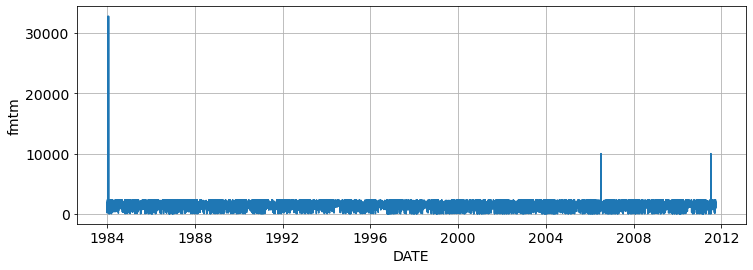

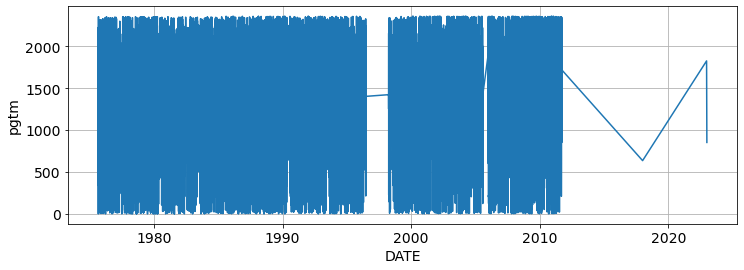

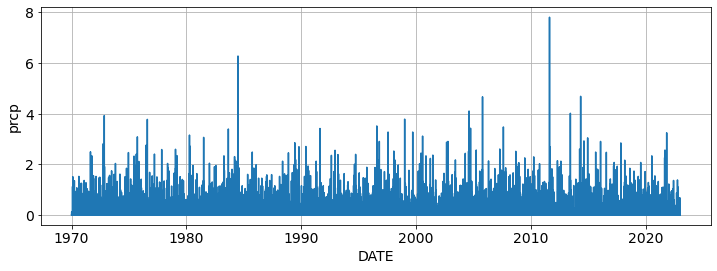

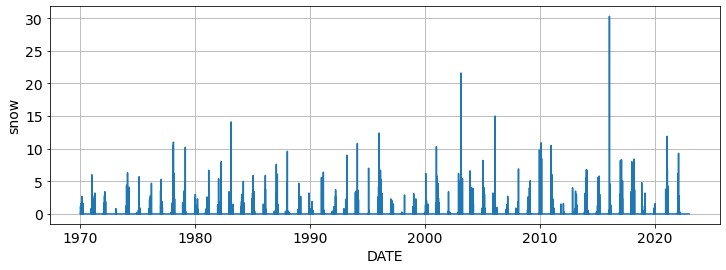

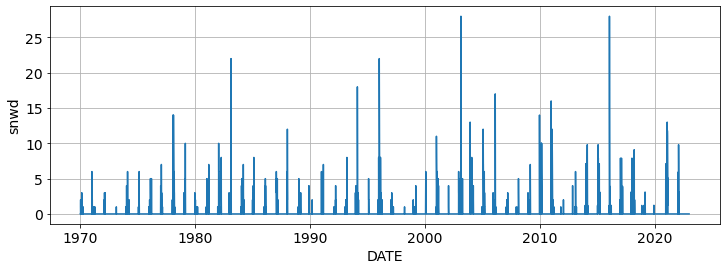

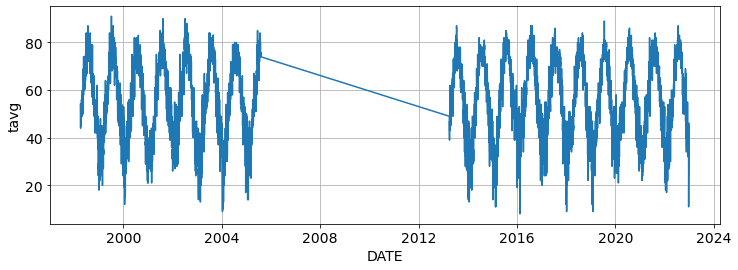

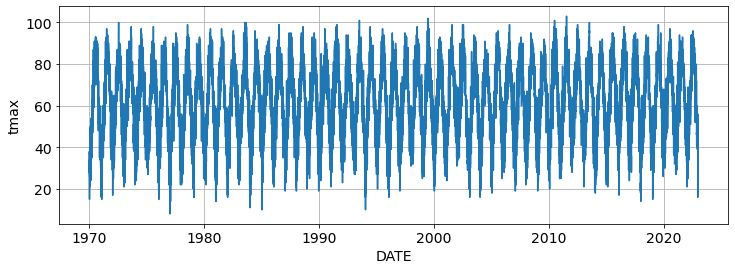

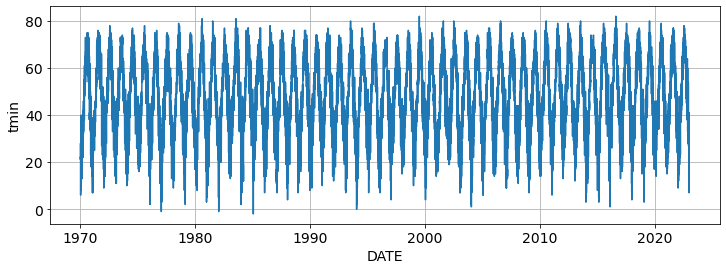

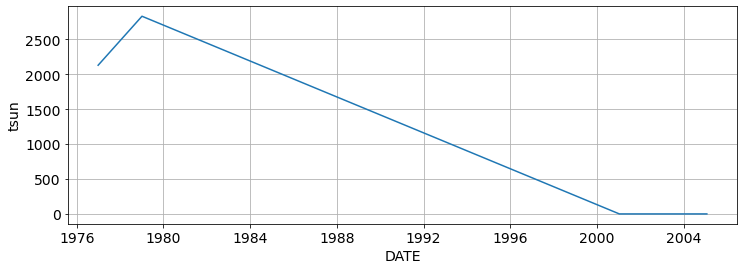

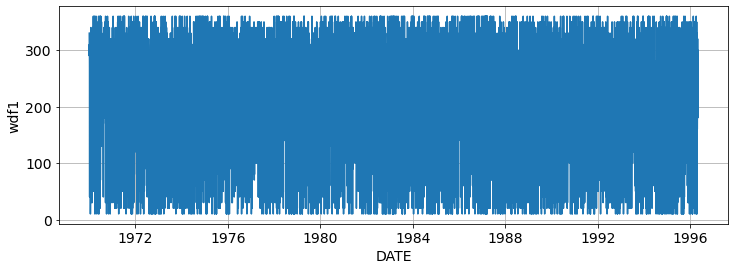

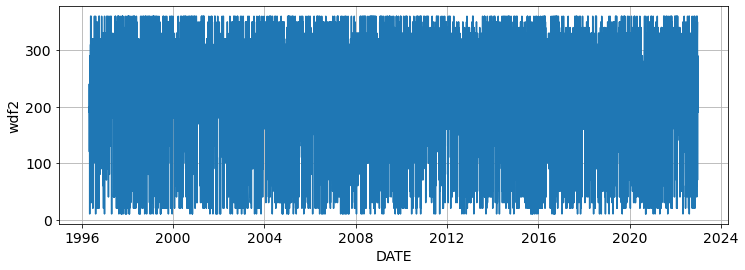

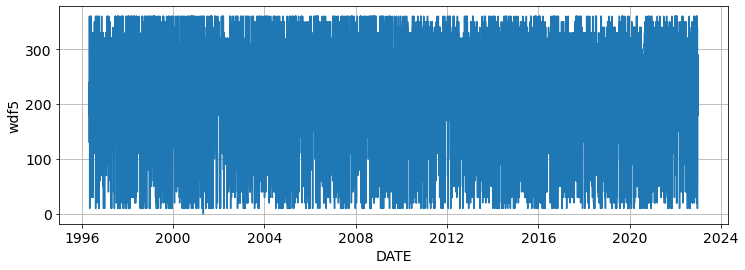

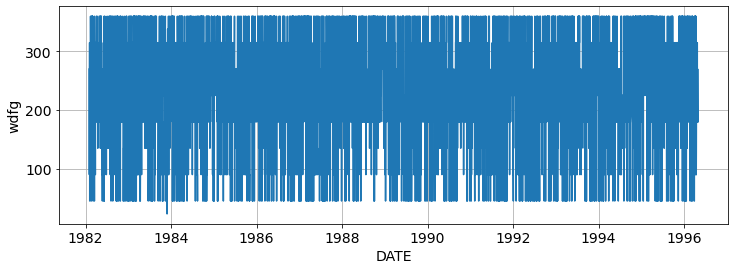

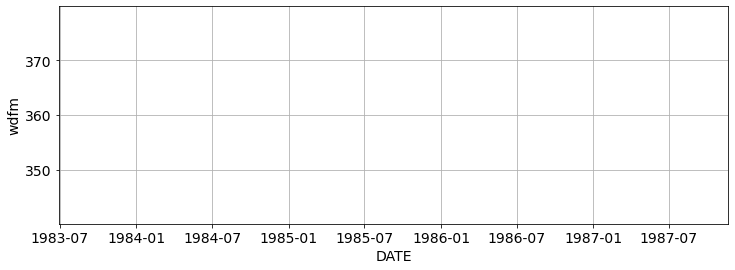

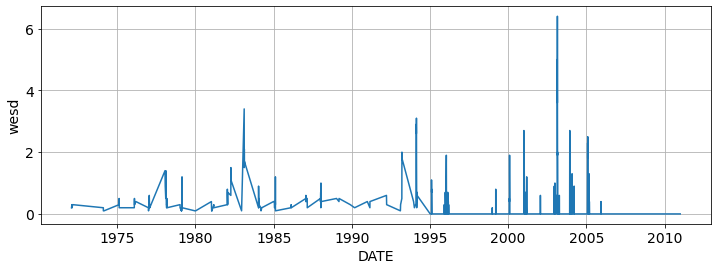

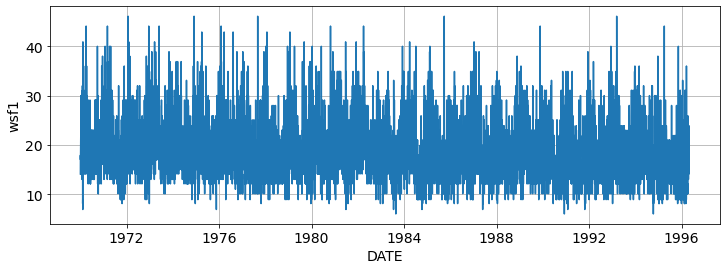

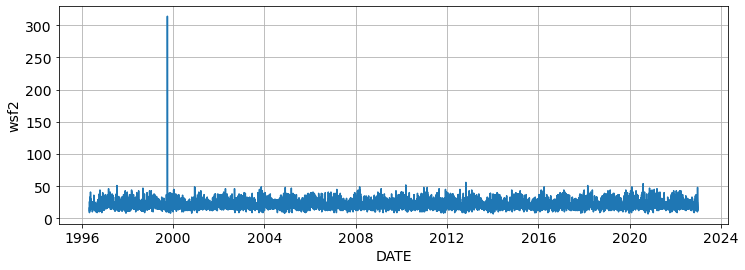

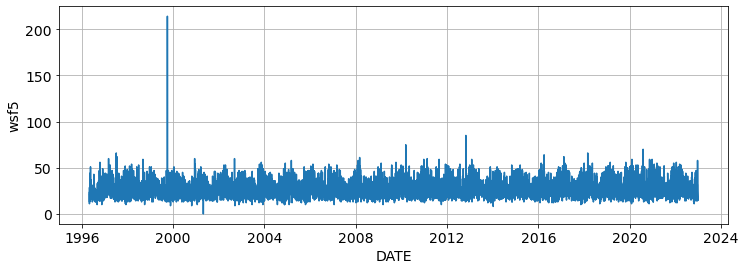

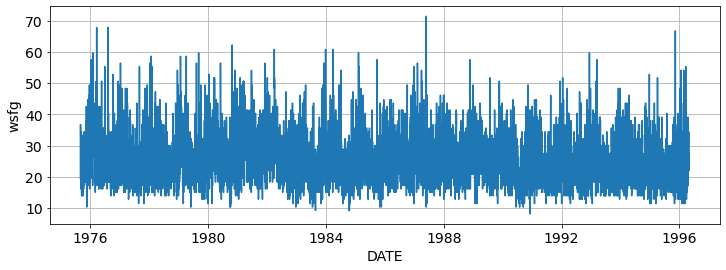

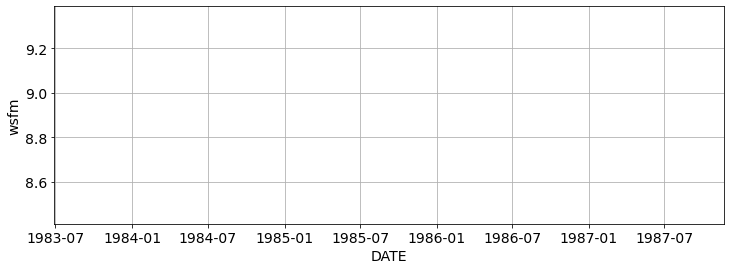

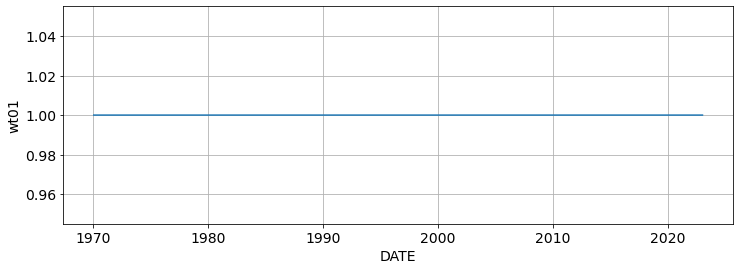

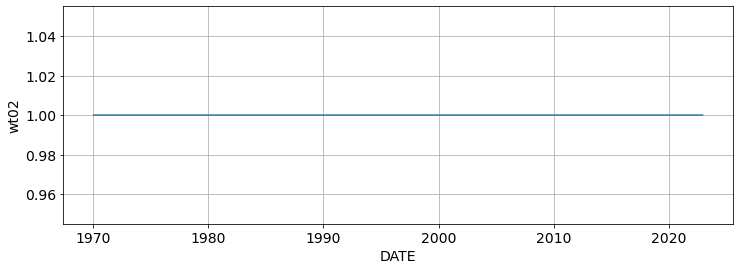

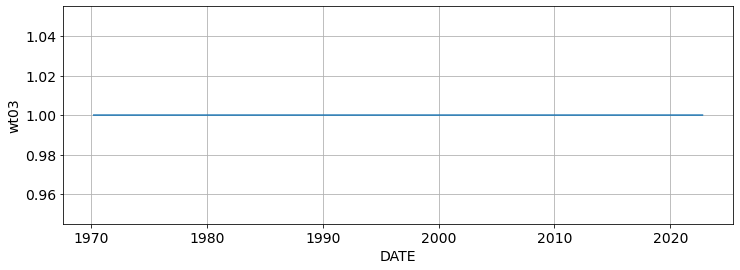

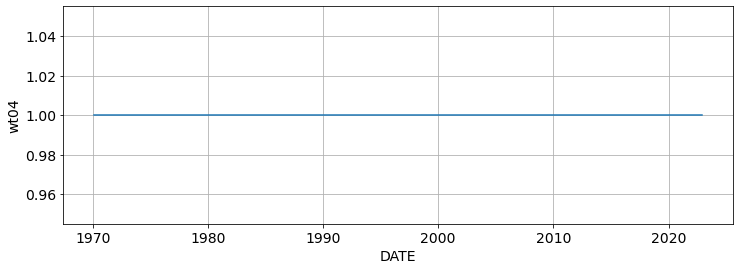

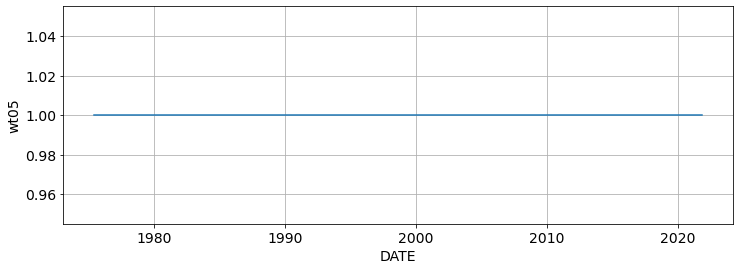

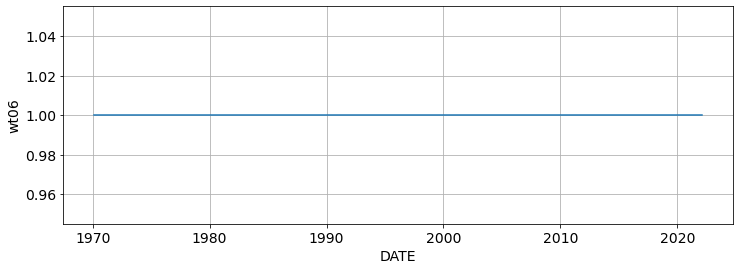

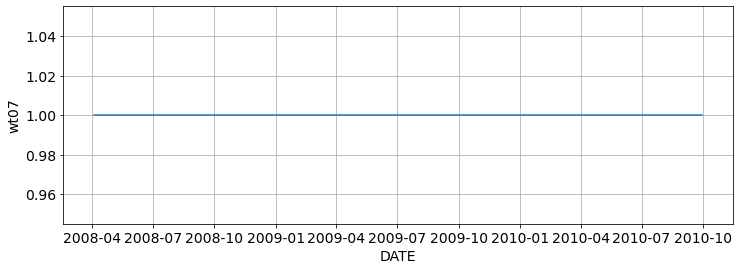

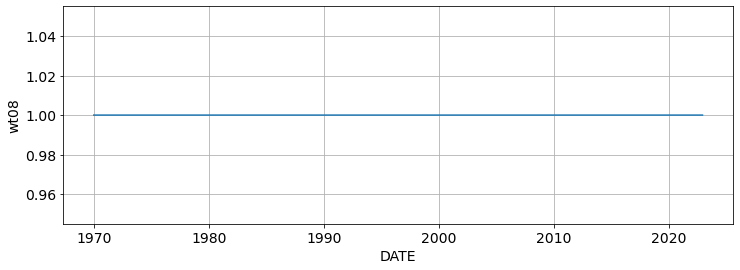

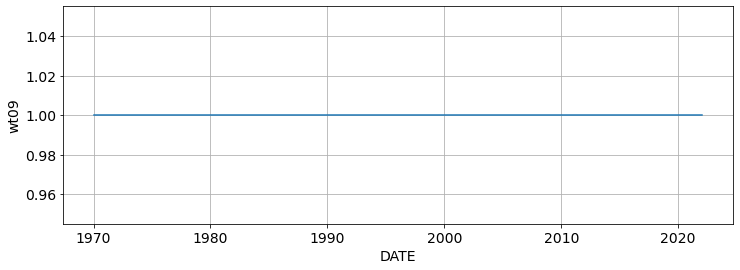

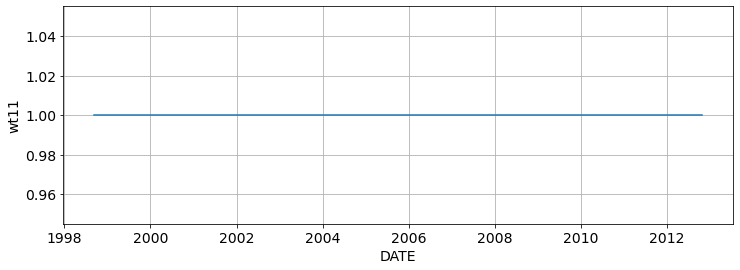

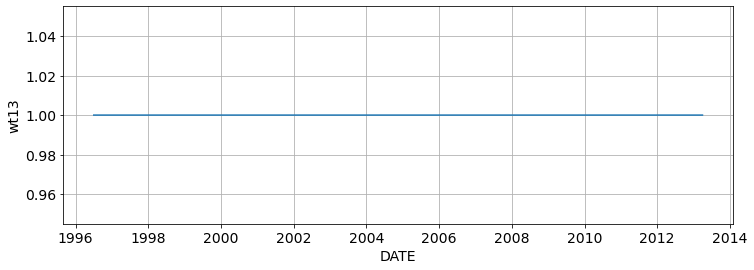

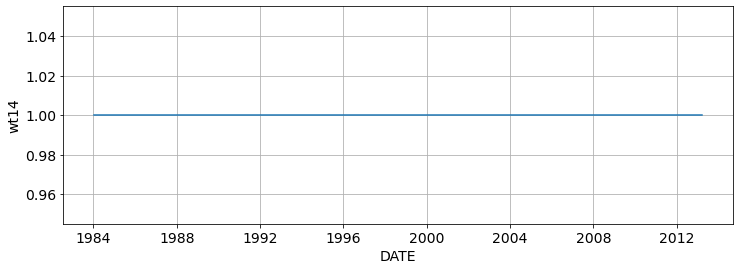

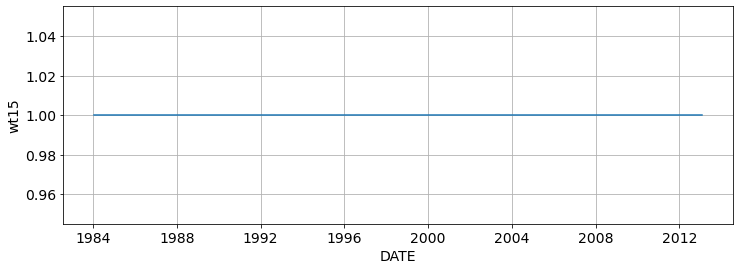

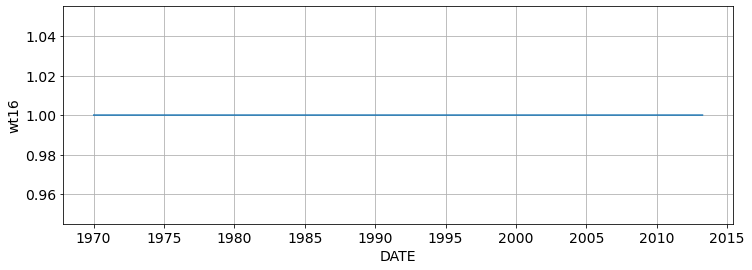

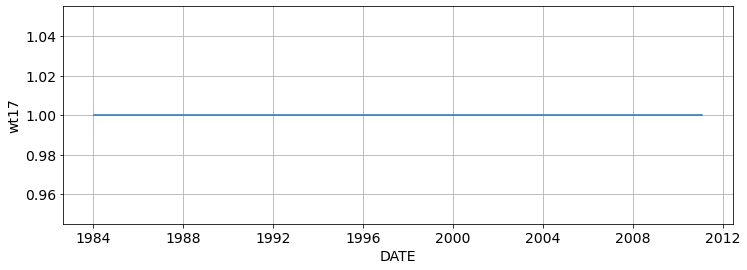

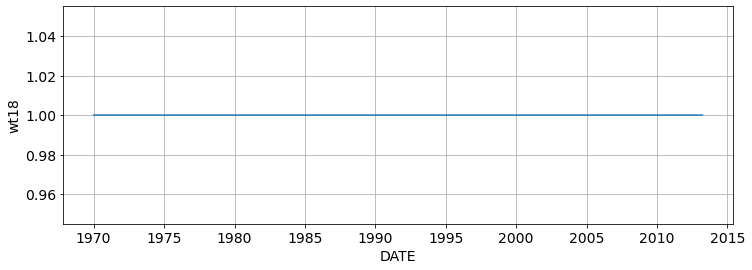

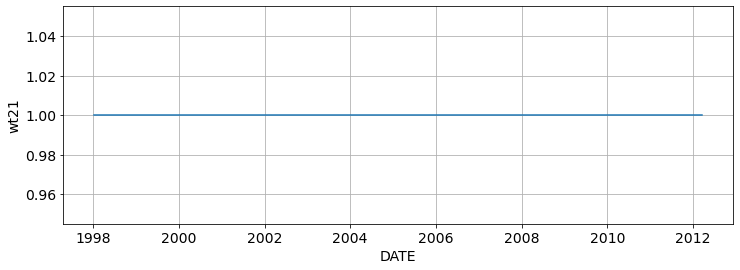

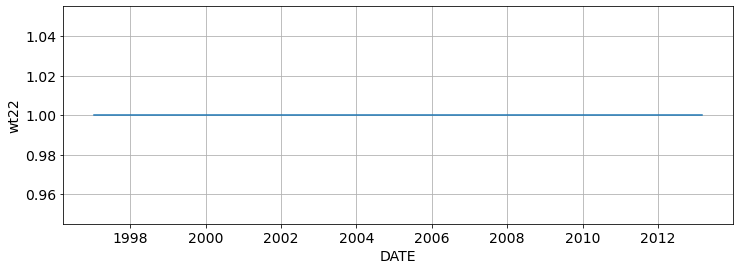

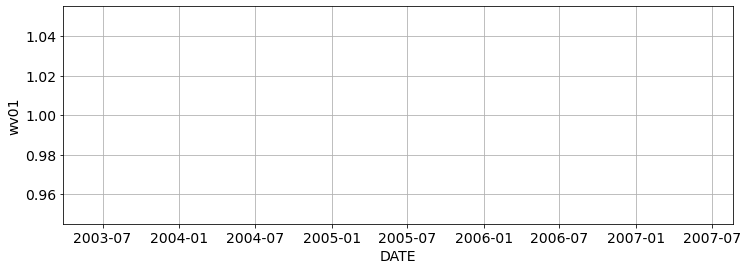

In [22]:
# using seaborn
for column in df.columns:
    sns.lineplot(data = df, x='DATE' , y=column)
    plt.show()

<AxesSubplot:>

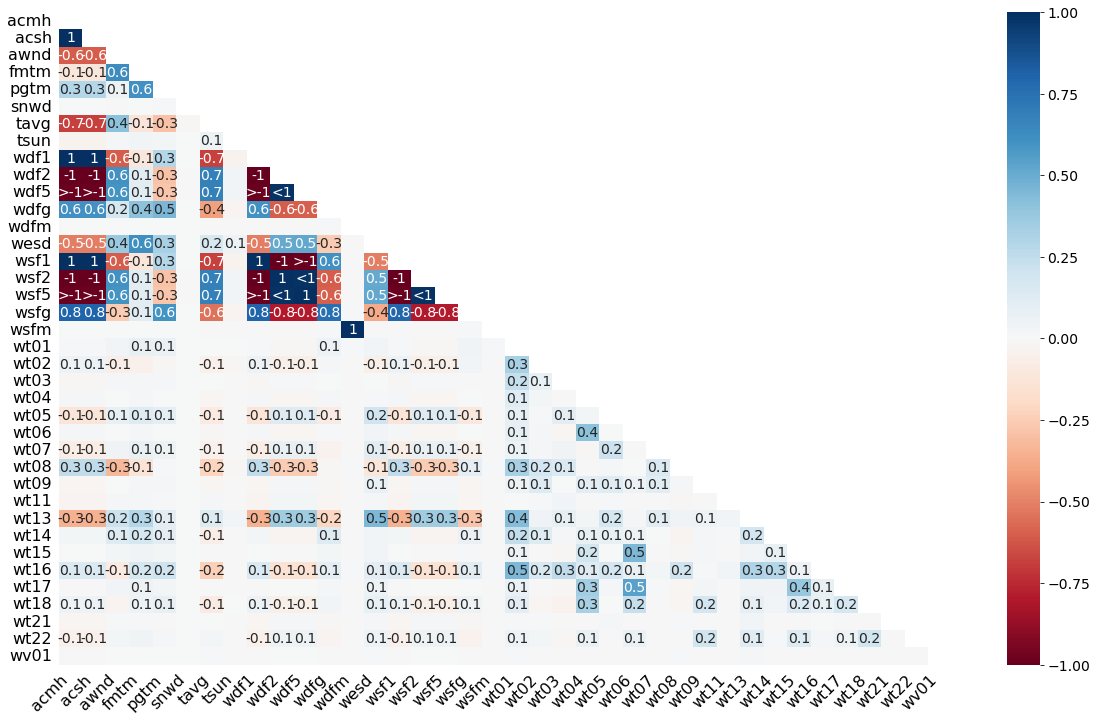

In [23]:
mno.heatmap(df)

## POSITIVE CORRELATION 
* ACSH: ACMH
* WDF1 : ACMH, ACSH
* WDF5 : WDF2
* WSF1: ACMH, ACSH, WDF1
* WSF5: WDF2,WDF5, WSF2
* WSFM: WDFM
## NEGATIVE CORRELATION
* WDF2: WDF1, ACMH, ACSH
* WDF5 : WDF1, ACMH, ACSH
* WSF1: WDF2, WDF5
* WSF2: ACMH, ACSH , WDF1, WSF1
* WSF5: ACMH, ACSH, WDF1, WSF1

In [24]:
# columns with non-null values
non_null_columns = []
less_than5_columns = []
less_than25_columns = []
more_than25_columns = []
for column in weather.columns:
    if (weather[column].apply(pd.isnull).sum()/weather.shape[0])*100 == 0.0:
        non_null_columns.append(column)
    elif weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 > 0.0 and weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 <= 5.0 :
        less_than5_columns.append(column)
    elif weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 > 5.0 and weather[column].apply(pd.isnull).sum()/weather.shape[0]*100 <= 25.0:
        less_than25_columns.append(column)
    elif (weather[column].apply(pd.isnull).sum()/weather.shape[0])*100 > 25.0:
        more_than25_columns.append(column)
print(len(non_null_columns))
print(non_null_columns)
print(len(less_than5_columns))
print(less_than5_columns)
print(len(less_than25_columns))
print(less_than25_columns)
print(len(more_than25_columns))
print(more_than25_columns)

6
['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN']
1
['SNWD']
0
[]
37
['ACMH', 'ACSH', 'AWND', 'FMTM', 'PGTM', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22', 'WV01']


## HANDLING MISSING VALUES FOR COLUMN WITH DATA MISSING LESS THAN 5% 

In [25]:
df.columns.get_loc("snwd")

7

In [26]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols
df.dropna(axis=0, subset=['snwd'], inplace = True)

In [27]:
df.isnull().sum()

acmh     9742
acsh     9741
awnd     5116
fmtm     9233
pgtm     7088
prcp        0
snow        0
snwd        0
tavg    13123
tmax        0
tmin        0
tsun    19326
wdf1     9746
wdf2     9618
wdf5     9701
wdfg    14236
wdfm    19356
wesd    13286
wsf1     9743
wsf2     9618
wsf5     9702
wsfg    11894
wsfm    19356
wt01    12200
wt02    18100
wt03    18070
wt04    19020
wt05    18993
wt06    19176
wt07    19249
wt08    15436
wt09    19217
wt11    19343
wt13    17172
wt14    18470
wt15    19315
wt16    12780
wt17    19297
wt18    18190
wt21    19352
wt22    19308
wv01    19356
dtype: int64

In [28]:
# if we do cca on the missing data, we only lose 0.005 % of the data
len(df)/len(weather)

0.9999483417708441

In [29]:
df.shape

(19357, 42)

In [30]:
null_perc=pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()*100/df.shape[0], columns =["Percentage of null values"])
null_perc["Total NaN values"]=df[df.columns[df.isnull().any()]].isnull().sum()
null_perc["Total Non-Nan Values"]=df.shape[0]-null_perc["Total NaN values"]
null_perc["Percentage of Non-Nan Values"] = 100 - null_perc["Percentage of null values"]

In [31]:
null_perc.sort_values(by="Percentage of null values")

,Percentage of null values,Total NaN values,Total Non-Nan Values,Percentage of Non-Nan Values
awnd,26.429715,5116,14241,73.570285
pgtm,36.617244,7088,12269,63.382756
fmtm,47.698507,9233,10124,52.301493
wdf2,49.687452,9618,9739,50.312548
wsf2,49.687452,9618,9739,50.312548
wdf5,50.116237,9701,9656,49.883763
wsf5,50.121403,9702,9655,49.878597
acsh,50.322881,9741,9616,49.677119
acmh,50.328047,9742,9615,49.671953
wsf1,50.333213,9743,9614,49.666787


In [32]:
dropdf = df.copy()
dropdf.shape

(19357, 42)

# DROPPING NULL VALUES

In [33]:
nullthresh = ((49.5/100)*(len(dropdf)))
print(nullthresh)

9581.715


In [34]:
# Drop columns that have more than 75% missing values
dropdf.dropna(thresh=nullthresh, axis=1,inplace=True)

In [35]:
dropdf.head()

,acmh,acsh,awnd,fmtm,pgtm,prcp,snow,snwd,tmax,tmin,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,28,22,330.0,NaN,NaN,14.1,NaN,NaN
1970-01-02,30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,31,22,290.0,NaN,NaN,17.9,NaN,NaN
1970-01-03,80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,38,25,310.0,NaN,NaN,17.0,NaN,NaN
1970-01-04,10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,31,23,300.0,NaN,NaN,17.9,NaN,NaN
1970-01-05,30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,35,21,270.0,NaN,NaN,19.9,NaN,NaN


In [36]:
dropdf.isnull().sum()

acmh    9742
acsh    9741
awnd    5116
fmtm    9233
pgtm    7088
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
wdf1    9746
wdf2    9618
wdf5    9701
wsf1    9743
wsf2    9618
wsf5    9702
dtype: int64

In [37]:
dropdf.shape

(19357, 16)

# MEAN IMPUTATION

In [38]:
dropdf.isnull().mean()

acmh    0.503280
acsh    0.503229
awnd    0.264297
fmtm    0.476985
pgtm    0.366172
prcp    0.000000
snow    0.000000
snwd    0.000000
tmax    0.000000
tmin    0.000000
wdf1    0.503487
wdf2    0.496875
wdf5    0.501162
wsf1    0.503332
wsf2    0.496875
wsf5    0.501214
dtype: float64

In [39]:
nullcols = [var for var in dropdf.columns if dropdf[var].isnull().mean() > 0]
null_columns = dropdf[nullcols]
numimpute = null_columns.copy()
numimpute['DATE'] = null_columns.index
numimpute.set_index("DATE", inplace=True)
numimpute.head()
numimpute.isnull().mean()

acmh    0.503280
acsh    0.503229
awnd    0.264297
fmtm    0.476985
pgtm    0.366172
wdf1    0.503487
wdf2    0.496875
wdf5    0.501162
wsf1    0.503332
wsf2    0.496875
wsf5    0.501214
dtype: float64

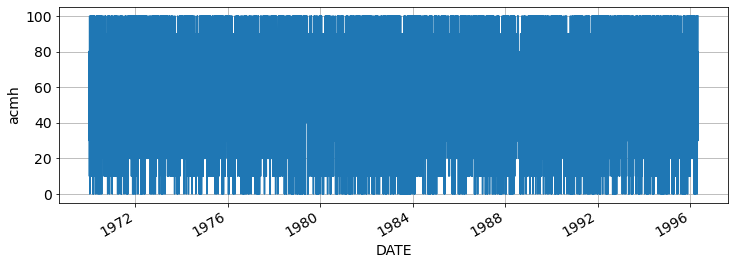

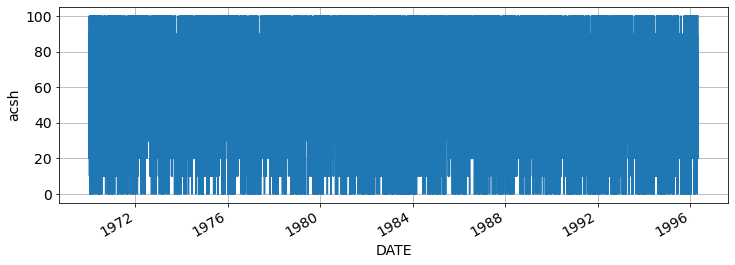

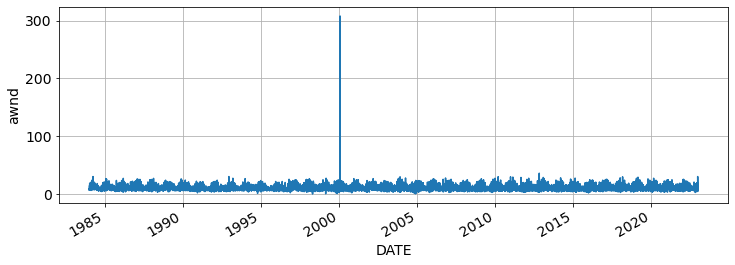

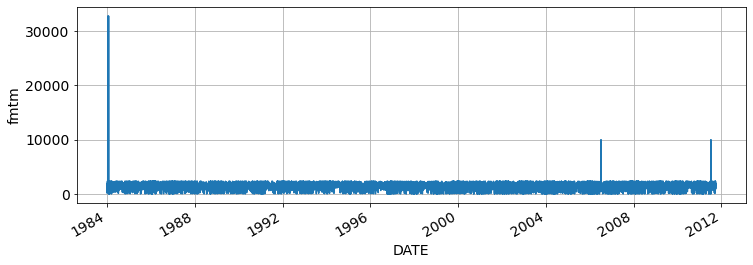

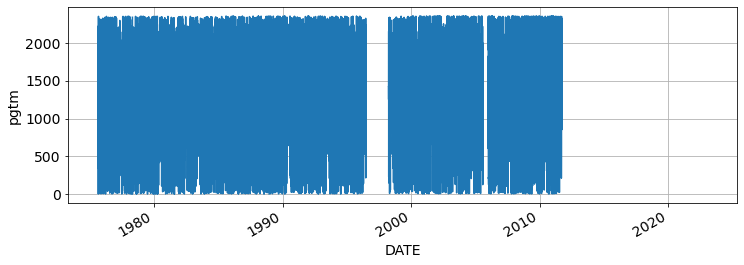

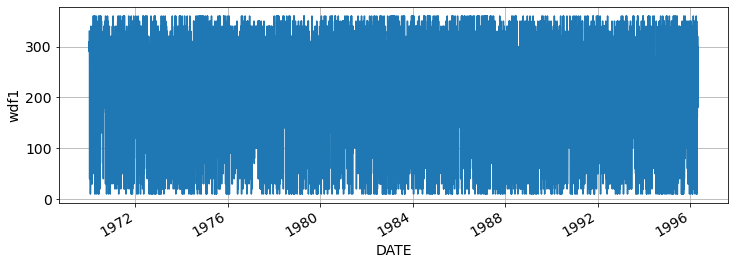

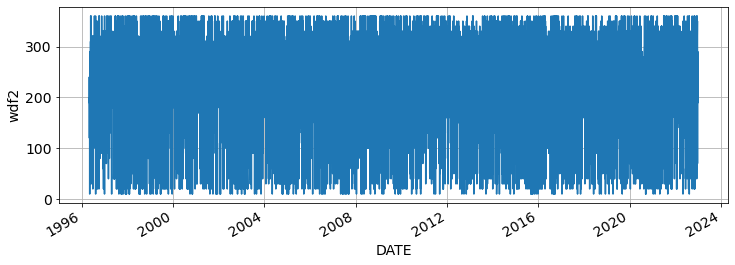

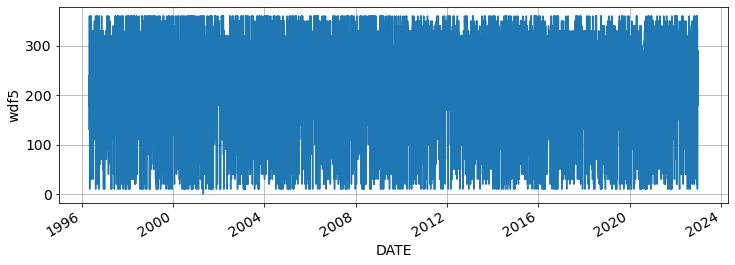

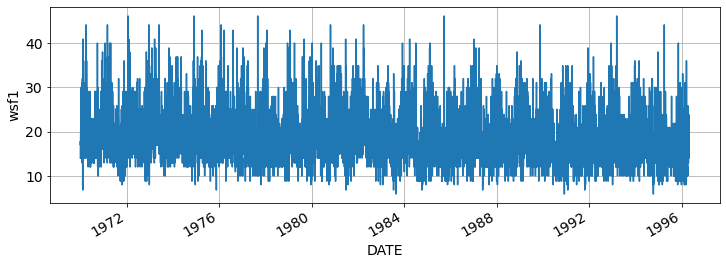

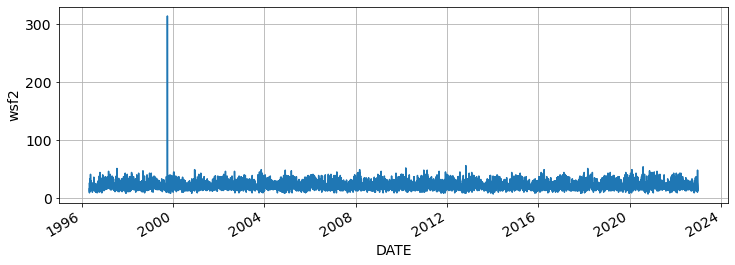

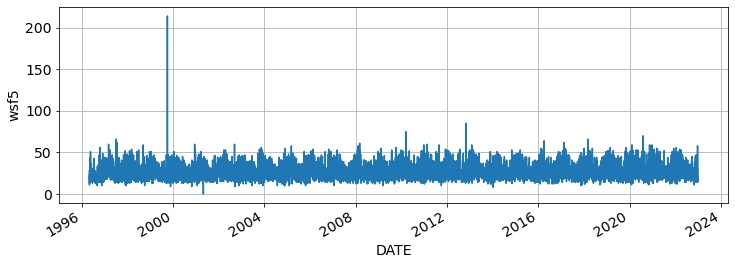

In [40]:
for column in numimpute.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    numimpute[column].plot()
    plt.show()

In [41]:
numimpute.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=19357, freq=None)

In [42]:
imputer = SimpleImputer(strategy = 'mean' )
imputer.fit(numimpute)
mean_imputed_df = pd.DataFrame(imputer.transform(numimpute), columns = numimpute.columns, index = numimpute.index)
mean_imputed_df.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,11.237777,1438.505828,1383.881245,330.0,215.474895,215.179163,14.1,22.049009,27.189363
1970-01-02,30.0,20.0,11.237777,1438.505828,1383.881245,290.0,215.474895,215.179163,17.9,22.049009,27.189363
1970-01-03,80.0,100.0,11.237777,1438.505828,1383.881245,310.0,215.474895,215.179163,17.0,22.049009,27.189363
1970-01-04,10.0,20.0,11.237777,1438.505828,1383.881245,300.0,215.474895,215.179163,17.9,22.049009,27.189363
1970-01-05,30.0,10.0,11.237777,1438.505828,1383.881245,270.0,215.474895,215.179163,19.9,22.049009,27.189363


In [43]:
for i in range(len(mean_imputed_df.columns)):
    column_name = mean_imputed_df.columns[i]+"_mean"
    mean_imputed_df = mean_imputed_df.rename(columns={mean_imputed_df.columns[i]:column_name})
print(mean_imputed_df)

            acmh_mean   acsh_mean  awnd_mean    fmtm_mean    pgtm_mean  \
DATE                                                                     
1970-01-01  80.000000   90.000000  11.237777  1438.505828  1383.881245   
1970-01-02  30.000000   20.000000  11.237777  1438.505828  1383.881245   
1970-01-03  80.000000  100.000000  11.237777  1438.505828  1383.881245   
1970-01-04  10.000000   20.000000  11.237777  1438.505828  1383.881245   
1970-01-05  30.000000   10.000000  11.237777  1438.505828  1383.881245   
...               ...         ...        ...          ...          ...   
2022-12-27  57.886635   60.665557  10.740000  1438.505828  1383.881245   
2022-12-28  57.886635   60.665557   8.500000  1438.505828  1383.881245   
2022-12-29  57.886635   60.665557   7.160000  1438.505828  1383.881245   
2022-12-30  57.886635   60.665557   6.260000  1438.505828   853.000000   
2022-12-31  57.886635   60.665557  11.237777  1438.505828  1383.881245   

             wdf1_mean   wdf2_mean   

In [44]:
mean_imputed_df.describe()

,acmh_mean,acsh_mean,awnd_mean,fmtm_mean,pgtm_mean,wdf1_mean,wdf2_mean,wdf5_mean,wsf1_mean,wsf2_mean,wsf5_mean
count,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000,19357.000000
mean,57.886635,60.665557,11.237777,1438.505828,1383.881245,212.060139,215.474895,215.179163,18.729436,22.049009,27.189363
std,21.574298,23.507462,4.111887,548.374796,502.621227,70.801003,69.087085,69.794702,4.062723,5.214844,6.245439
min,0.000000,0.000000,0.220000,0.000000,0.000000,10.000000,10.000000,0.000000,6.000000,6.900000,0.000000
25%,57.886635,60.665557,9.170000,1438.505828,1316.000000,210.000000,210.000000,215.179163,17.000000,21.000000,25.900000
50%,57.886635,60.665557,11.237777,1438.505828,1383.881245,212.060139,215.474895,215.179163,18.729436,22.049009,27.189363
75%,60.000000,70.000000,12.300000,1550.000000,1627.000000,212.060139,215.474895,215.179163,18.729436,22.049009,27.189363
max,100.000000,100.000000,308.030000,32767.000000,2359.000000,360.000000,360.000000,360.000000,46.100000,314.100000,214.100000


In [45]:
mean_imputed_df.isnull().mean()

acmh_mean    0.0
acsh_mean    0.0
awnd_mean    0.0
fmtm_mean    0.0
pgtm_mean    0.0
wdf1_mean    0.0
wdf2_mean    0.0
wdf5_mean    0.0
wsf1_mean    0.0
wsf2_mean    0.0
wsf5_mean    0.0
dtype: float64

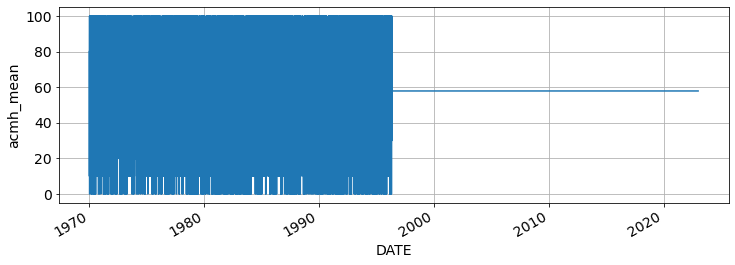

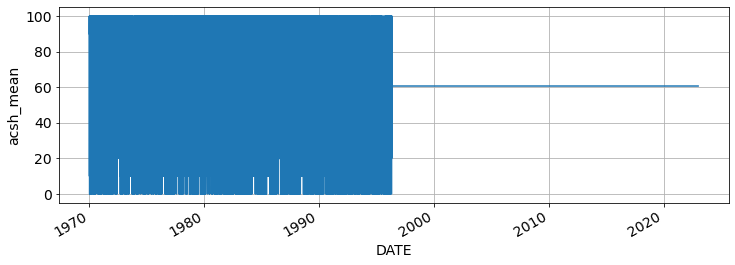

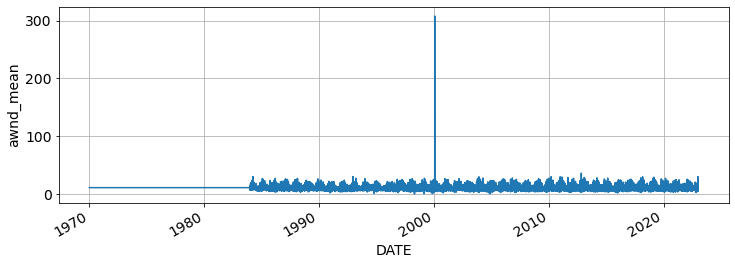

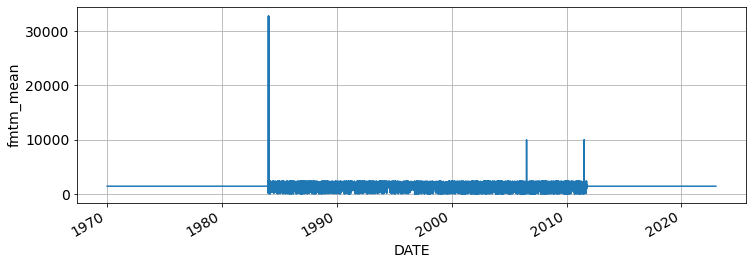

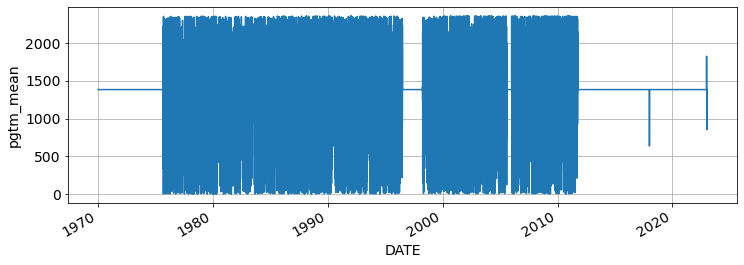

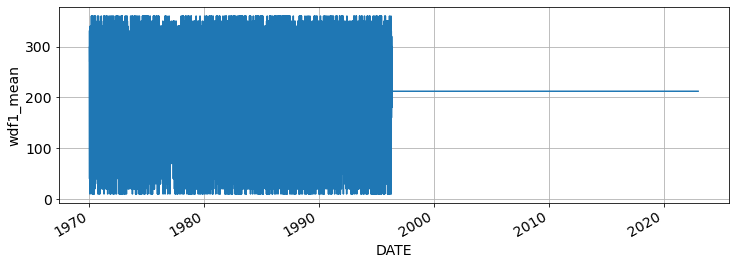

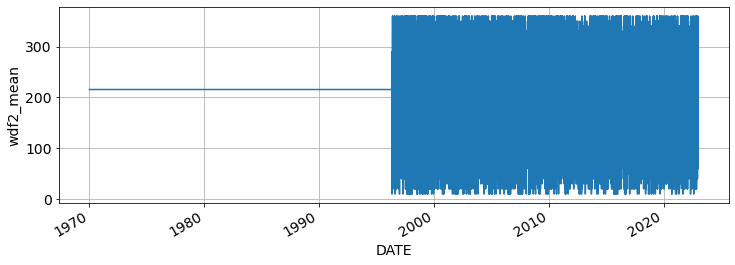

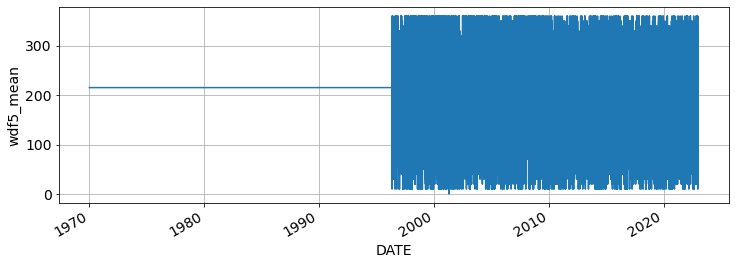

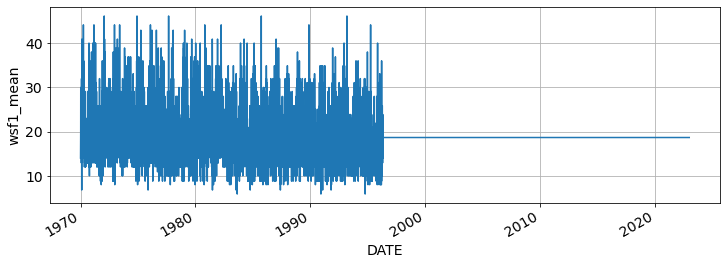

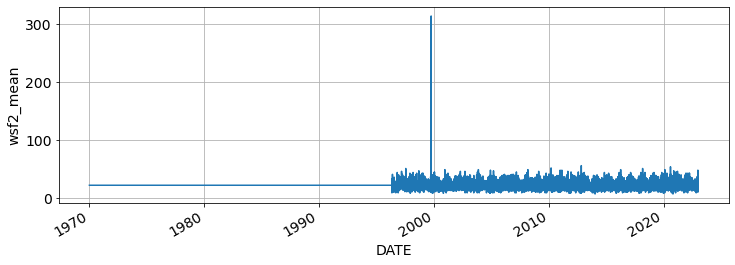

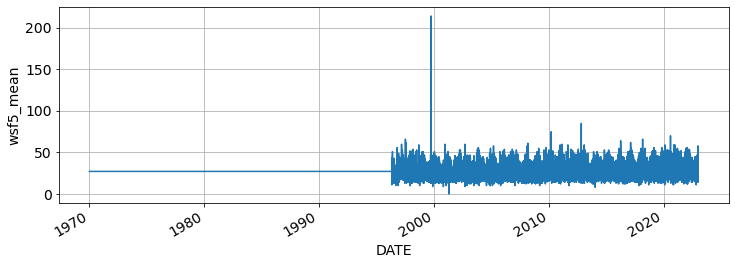

In [46]:
for column in mean_imputed_df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    mean_imputed_df[column].plot()
    plt.show()

In [47]:
meandf = pd.concat([numimpute, mean_imputed_df], axis = 1)

In [48]:
meandf.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5,acmh_mean,acsh_mean,awnd_mean,fmtm_mean,pgtm_mean,wdf1_mean,wdf2_mean,wdf5_mean,wsf1_mean,wsf2_mean,wsf5_mean
DATE,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN,80.0,90.0,11.237777,1438.505828,1383.881245,330.0,215.474895,215.179163,14.1,22.049009,27.189363
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN,30.0,20.0,11.237777,1438.505828,1383.881245,290.0,215.474895,215.179163,17.9,22.049009,27.189363
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN,80.0,100.0,11.237777,1438.505828,1383.881245,310.0,215.474895,215.179163,17.0,22.049009,27.189363
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN,10.0,20.0,11.237777,1438.505828,1383.881245,300.0,215.474895,215.179163,17.9,22.049009,27.189363
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN,30.0,10.0,11.237777,1438.505828,1383.881245,270.0,215.474895,215.179163,19.9,22.049009,27.189363


# MEDIAN IMPUTATION

In [49]:
imputer = SimpleImputer(strategy = 'median' )
imputer.fit(numimpute)
median_imputed_df = pd.DataFrame(imputer.transform(numimpute), columns = numimpute.columns, index = numimpute.index)
median_imputed_df.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,10.51,1526.0,1458.0,330.0,210.0,210.0,14.1,21.0,25.9
1970-01-02,30.0,20.0,10.51,1526.0,1458.0,290.0,210.0,210.0,17.9,21.0,25.9
1970-01-03,80.0,100.0,10.51,1526.0,1458.0,310.0,210.0,210.0,17.0,21.0,25.9
1970-01-04,10.0,20.0,10.51,1526.0,1458.0,300.0,210.0,210.0,17.9,21.0,25.9
1970-01-05,30.0,10.0,10.51,1526.0,1458.0,270.0,210.0,210.0,19.9,21.0,25.9


In [50]:
for i in range(len(median_imputed_df.columns)):
    column_name = median_imputed_df.columns[i]+"_median"
    median_imputed_df = median_imputed_df.rename(columns={median_imputed_df.columns[i]:column_name})
print(median_imputed_df)

            acmh_median  acsh_median  awnd_median  fmtm_median  pgtm_median  \
DATE                                                                          
1970-01-01         80.0         90.0        10.51       1526.0       1458.0   
1970-01-02         30.0         20.0        10.51       1526.0       1458.0   
1970-01-03         80.0        100.0        10.51       1526.0       1458.0   
1970-01-04         10.0         20.0        10.51       1526.0       1458.0   
1970-01-05         30.0         10.0        10.51       1526.0       1458.0   
...                 ...          ...          ...          ...          ...   
2022-12-27         60.0         70.0        10.74       1526.0       1458.0   
2022-12-28         60.0         70.0         8.50       1526.0       1458.0   
2022-12-29         60.0         70.0         7.16       1526.0       1458.0   
2022-12-30         60.0         70.0         6.26       1526.0        853.0   
2022-12-31         60.0         70.0        10.51   

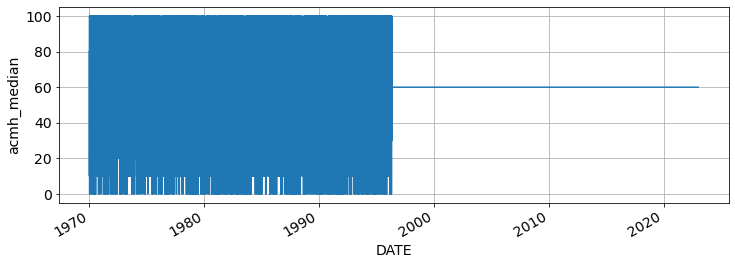

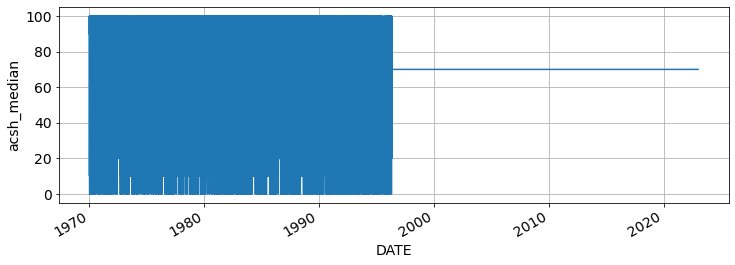

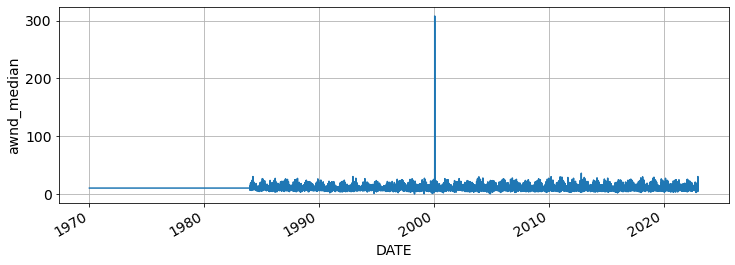

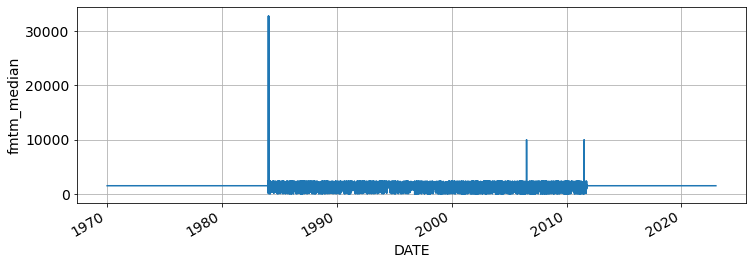

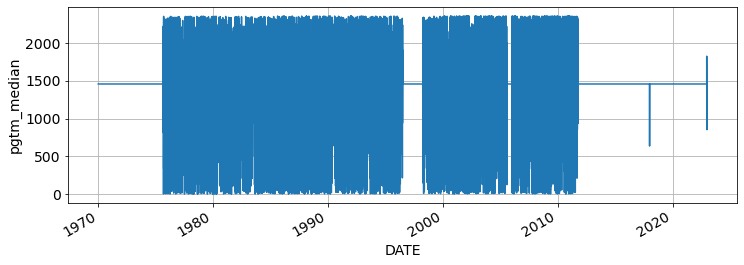

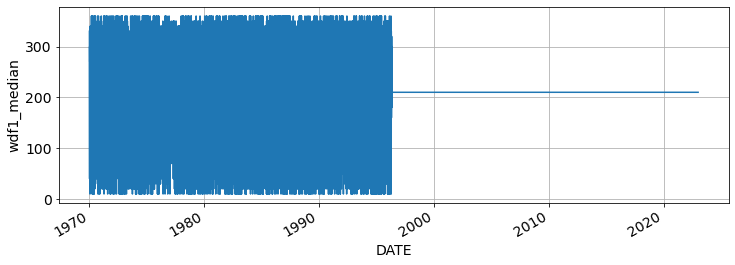

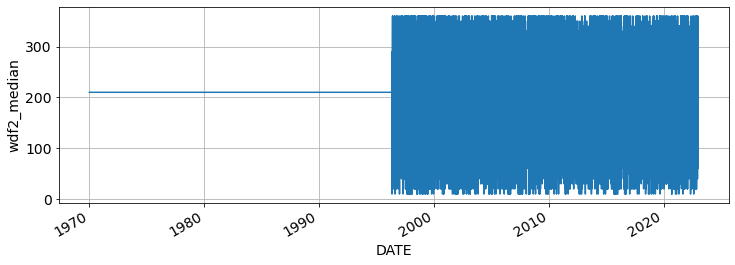

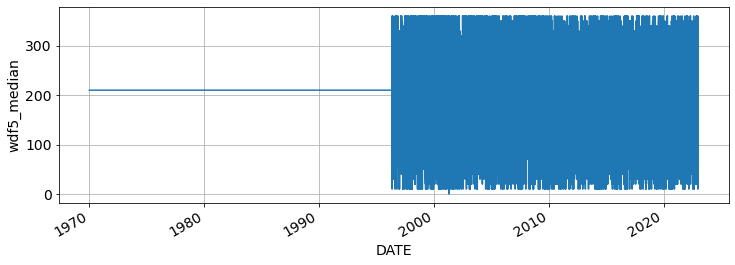

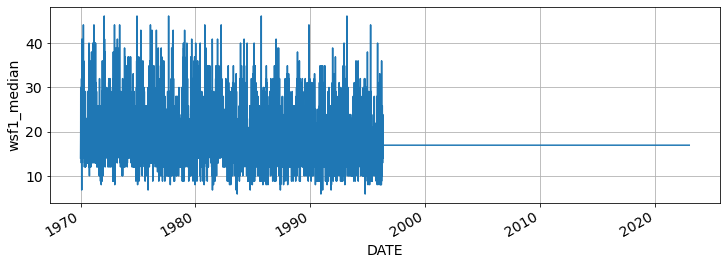

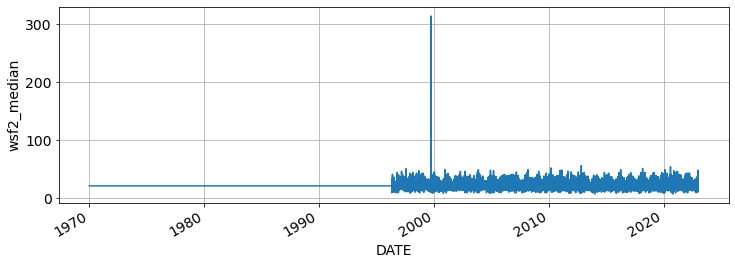

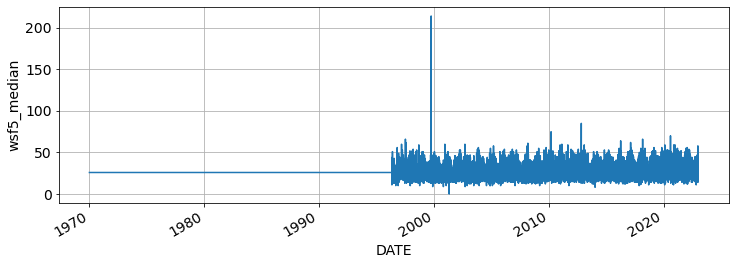

In [51]:
for column in median_imputed_df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    median_imputed_df[column].plot()
    plt.show()

In [52]:
mediandf = pd.concat([numimpute, median_imputed_df], axis = 1)

In [53]:
mediandf.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5,acmh_median,acsh_median,awnd_median,fmtm_median,pgtm_median,wdf1_median,wdf2_median,wdf5_median,wsf1_median,wsf2_median,wsf5_median
DATE,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN,80.0,90.0,10.51,1526.0,1458.0,330.0,210.0,210.0,14.1,21.0,25.9
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN,30.0,20.0,10.51,1526.0,1458.0,290.0,210.0,210.0,17.9,21.0,25.9
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN,80.0,100.0,10.51,1526.0,1458.0,310.0,210.0,210.0,17.0,21.0,25.9
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN,10.0,20.0,10.51,1526.0,1458.0,300.0,210.0,210.0,17.9,21.0,25.9
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN,30.0,10.0,10.51,1526.0,1458.0,270.0,210.0,210.0,19.9,21.0,25.9


In [54]:
imputed = pd.concat([numimpute, mean_imputed_df, median_imputed_df], axis=1)
imputed

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5,acmh_mean,acsh_mean,awnd_mean,fmtm_mean,pgtm_mean,wdf1_mean,wdf2_mean,wdf5_mean,wsf1_mean,wsf2_mean,wsf5_mean,acmh_median,acsh_median,awnd_median,fmtm_median,pgtm_median,wdf1_median,wdf2_median,wdf5_median,wsf1_median,wsf2_median,wsf5_median
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN,80.000000,90.000000,11.237777,1438.505828,1383.881245,330.000000,215.474895,215.179163,14.100000,22.049009,27.189363,80.0,90.0,10.51,1526.0,1458.0,330.0,210.0,210.0,14.1,21.0,25.9
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN,30.000000,20.000000,11.237777,1438.505828,1383.881245,290.000000,215.474895,215.179163,17.900000,22.049009,27.189363,30.0,20.0,10.51,1526.0,1458.0,290.0,210.0,210.0,17.9,21.0,25.9
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN,80.000000,100.000000,11.237777,1438.505828,1383.881245,310.000000,215.474895,215.179163,17.000000,22.049009,27.189363,80.0,100.0,10.51,1526.0,1458.0,310.0,210.0,210.0,17.0,21.0,25.9
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN,10.000000,20.000000,11.237777,1438.505828,1383.881245,300.000000,215.474895,215.179163,17.900000,22.049009,27.189363,10.0,20.0,10.51,1526.0,1458.0,300.0,210.0,210.0,17.9,21.0,25.9
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN,30.000000,10.000000,11.237777,1438.505828,1383.881245,270.000000,215.474895,215.179163,19.900000,22.049009,27.189363,30.0,10.0,10.51,1526.0,1458.0,270.0,210.0,210.0,19.9,21.0,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,10.74,NaN,NaN,NaN,270.0,270.0,NaN,16.1,19.9,57.886635,60.665557,10.740000,1438.505828,1383.881245,212.060139,270.000000,270.000000,18.729436,16.100000,19.900000,60.0,70.0,10.74,1526.0,1458.0,210.0,270.0,270.0,17.0,16.1,19.9
2022-12-28,NaN,NaN,8.50,NaN,NaN,NaN,230.0,200.0,NaN,14.1,19.0,57.886635,60.665557,8.500000,1438.505828,1383.881245,212.060139,230.000000,200.000000,18.729436,14.100000,19.000000,60.0,70.0,8.50,1526.0,1458.0,210.0,230.0,200.0,17.0,14.1,19.0
2022-12-29,NaN,NaN,7.16,NaN,NaN,NaN,230.0,230.0,NaN,15.0,18.1,57.886635,60.665557,7.160000,1438.505828,1383.881245,212.060139,230.000000,230.000000,18.729436,15.000000,18.100000,60.0,70.0,7.16,1526.0,1458.0,210.0,230.0,230.0,17.0,15.0,18.1


# LAST OBSERVATION CARRIED FORWARD (LOCF)

In [55]:
locf_copy = numimpute.copy()
locf_copy['DATE'] = numimpute.index
locf_copy.set_index("DATE", inplace=True)
locf_copy.head()
locf_copy.isnull().mean()

acmh    0.503280
acsh    0.503229
awnd    0.264297
fmtm    0.476985
pgtm    0.366172
wdf1    0.503487
wdf2    0.496875
wdf5    0.501162
wsf1    0.503332
wsf2    0.496875
wsf5    0.501214
dtype: float64

In [56]:
# impute the missing values with the LOCF
locf_imputed_df= locf_copy.fillna(method='bfill')

In [57]:
locf_imputed_df.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,9.4,1252.0,1300.0,330.0,190.0,190.0,14.1,25.1,28.0
1970-01-02,30.0,20.0,9.4,1252.0,1300.0,290.0,190.0,190.0,17.9,25.1,28.0
1970-01-03,80.0,100.0,9.4,1252.0,1300.0,310.0,190.0,190.0,17.0,25.1,28.0
1970-01-04,10.0,20.0,9.4,1252.0,1300.0,300.0,190.0,190.0,17.9,25.1,28.0
1970-01-05,30.0,10.0,9.4,1252.0,1300.0,270.0,190.0,190.0,19.9,25.1,28.0


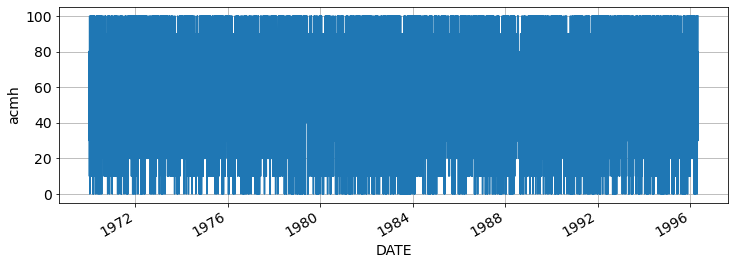

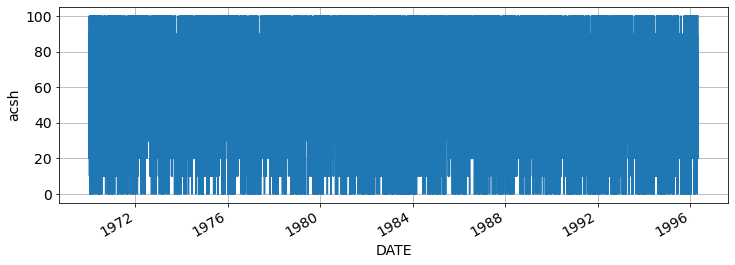

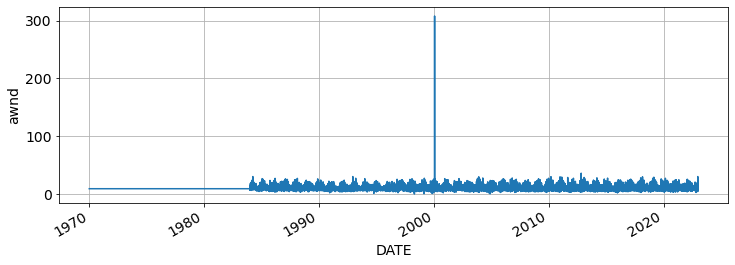

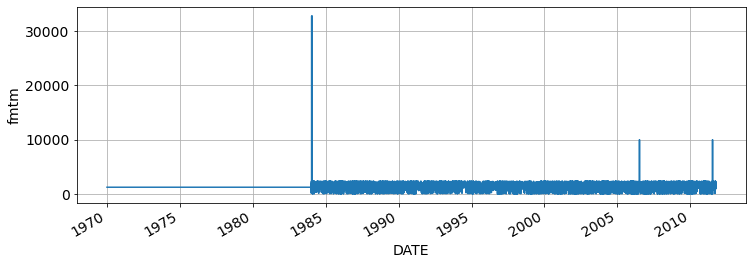

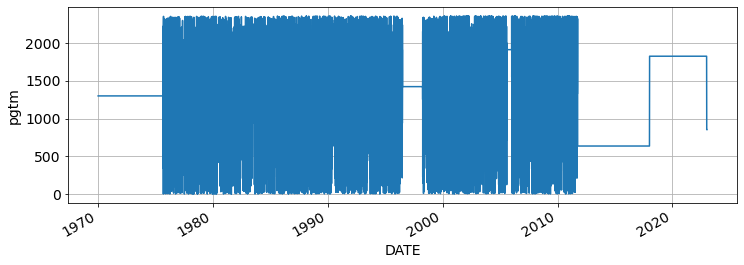

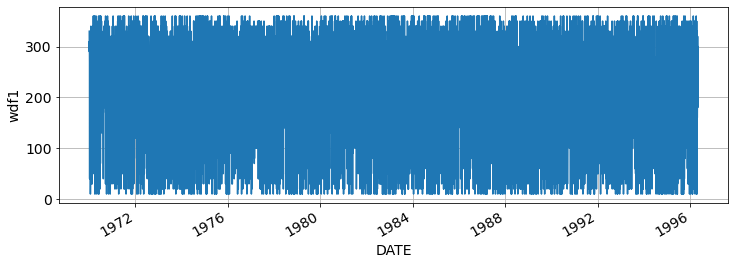

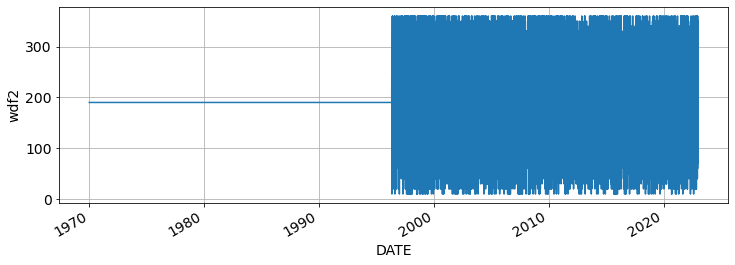

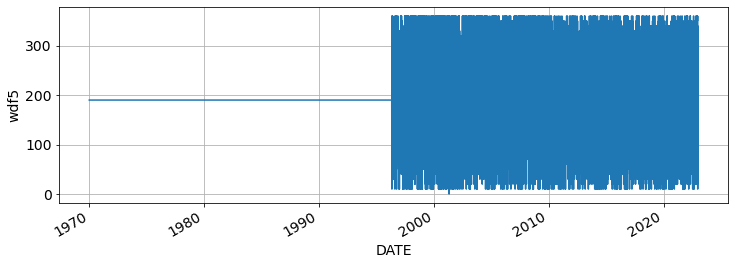

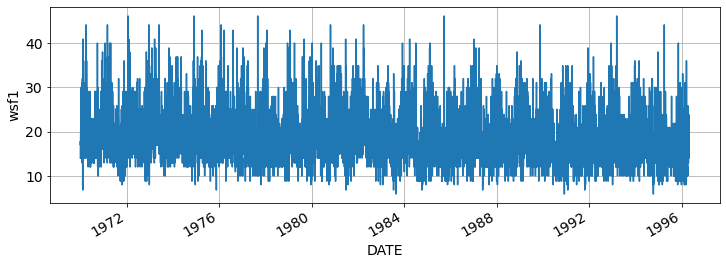

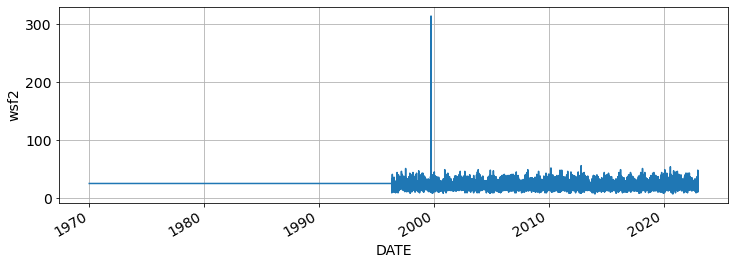

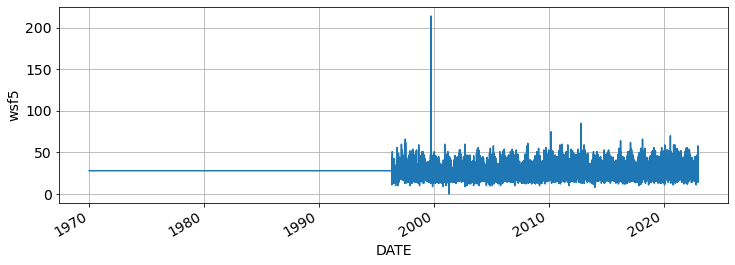

In [58]:
for column in locf_imputed_df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    locf_imputed_df[column].plot()
    plt.show()

In [59]:
for i in range(len(locf_imputed_df.columns)):
    column_name =locf_imputed_df.columns[i]+"_locf"
    locf_imputed_df = locf_imputed_df.rename(columns={locf_imputed_df.columns[i]:column_name})
print(locf_imputed_df)

            acmh_locf  acsh_locf  awnd_locf  fmtm_locf  pgtm_locf  wdf1_locf  \
DATE                                                                           
1970-01-01       80.0       90.0       9.40     1252.0     1300.0      330.0   
1970-01-02       30.0       20.0       9.40     1252.0     1300.0      290.0   
1970-01-03       80.0      100.0       9.40     1252.0     1300.0      310.0   
1970-01-04       10.0       20.0       9.40     1252.0     1300.0      300.0   
1970-01-05       30.0       10.0       9.40     1252.0     1300.0      270.0   
...               ...        ...        ...        ...        ...        ...   
2022-12-27        NaN        NaN      10.74        NaN      853.0        NaN   
2022-12-28        NaN        NaN       8.50        NaN      853.0        NaN   
2022-12-29        NaN        NaN       7.16        NaN      853.0        NaN   
2022-12-30        NaN        NaN       6.26        NaN      853.0        NaN   
2022-12-31        NaN        NaN        

In [60]:
locfdf = pd.concat([numimpute, locf_imputed_df], axis = 1)
locfdf.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5,acmh_locf,acsh_locf,awnd_locf,fmtm_locf,pgtm_locf,wdf1_locf,wdf2_locf,wdf5_locf,wsf1_locf,wsf2_locf,wsf5_locf
DATE,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN,80.0,90.0,9.4,1252.0,1300.0,330.0,190.0,190.0,14.1,25.1,28.0
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN,30.0,20.0,9.4,1252.0,1300.0,290.0,190.0,190.0,17.9,25.1,28.0
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN,80.0,100.0,9.4,1252.0,1300.0,310.0,190.0,190.0,17.0,25.1,28.0
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN,10.0,20.0,9.4,1252.0,1300.0,300.0,190.0,190.0,17.9,25.1,28.0
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN,30.0,10.0,9.4,1252.0,1300.0,270.0,190.0,190.0,19.9,25.1,28.0


# NEXT OBSERVATION CARRIED BACKWARD (NOCB)

In [61]:
nocb_copy = numimpute.copy()
nocb_copy['DATE'] = numimpute.index
nocb_copy.set_index("DATE", inplace=True)
nocb_copy.head()
nocb_copy.isnull().mean()

acmh    0.503280
acsh    0.503229
awnd    0.264297
fmtm    0.476985
pgtm    0.366172
wdf1    0.503487
wdf2    0.496875
wdf5    0.501162
wsf1    0.503332
wsf2    0.496875
wsf5    0.501214
dtype: float64

In [62]:
nocb_imputed_df= nocb_copy.fillna(method='ffill')

In [63]:
nocb_imputed_df.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN


In [64]:
nocb_imputed_df.isnull().sum()

acmh       0
acsh       0
awnd    5113
fmtm    5113
pgtm    2069
wdf1       0
wdf2    9617
wdf5    9617
wsf1       0
wsf2    9617
wsf5    9617
dtype: int64

In [65]:
nocb_copy.isnull().sum()

acmh    9742
acsh    9741
awnd    5116
fmtm    9233
pgtm    7088
wdf1    9746
wdf2    9618
wdf5    9701
wsf1    9743
wsf2    9618
wsf5    9702
dtype: int64

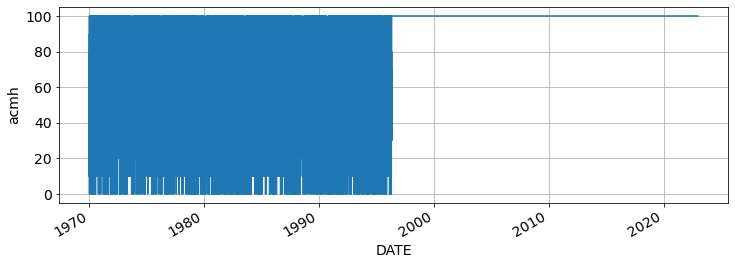

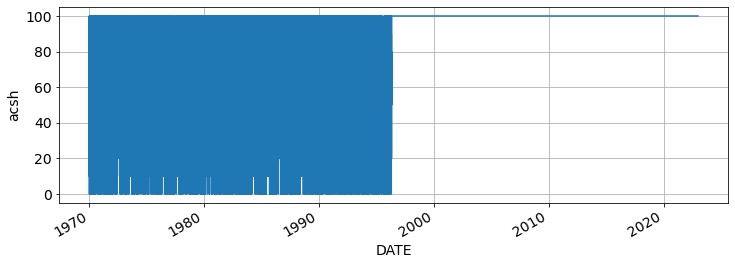

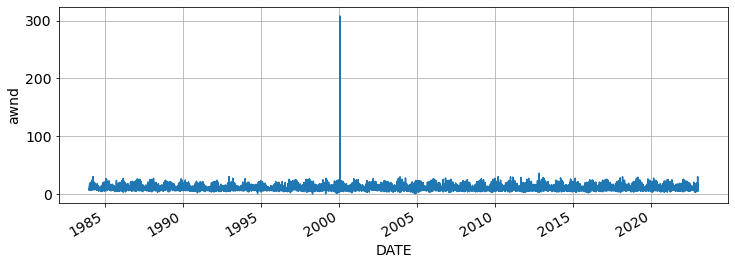

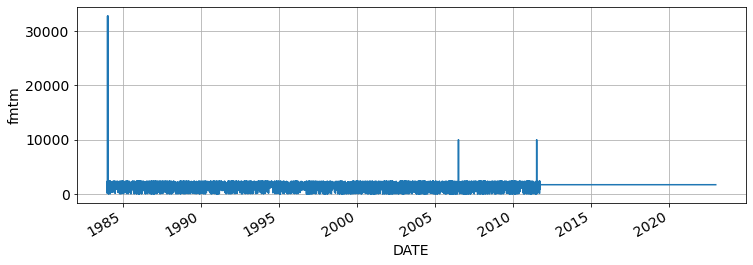

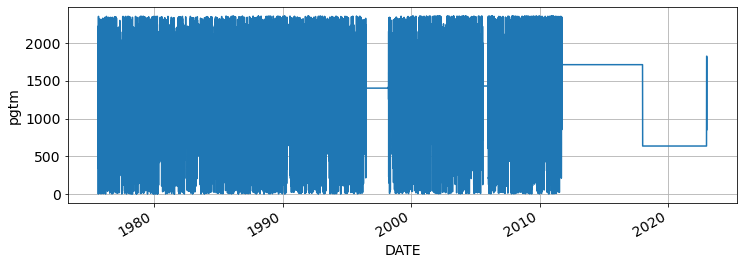

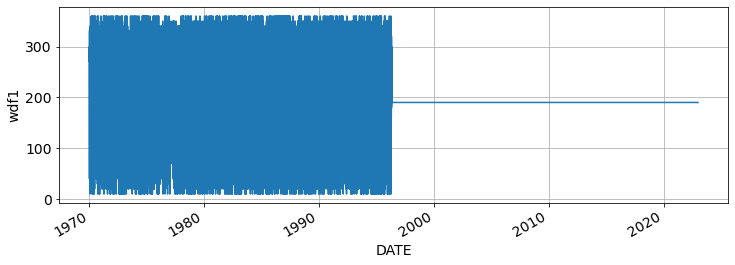

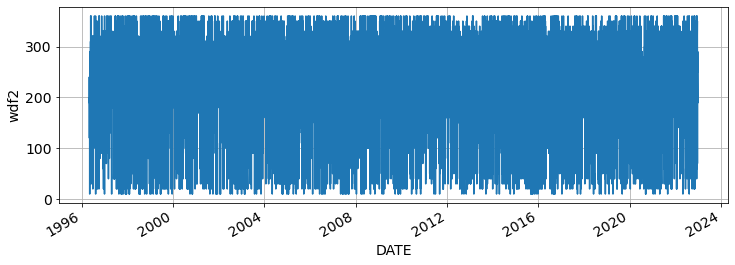

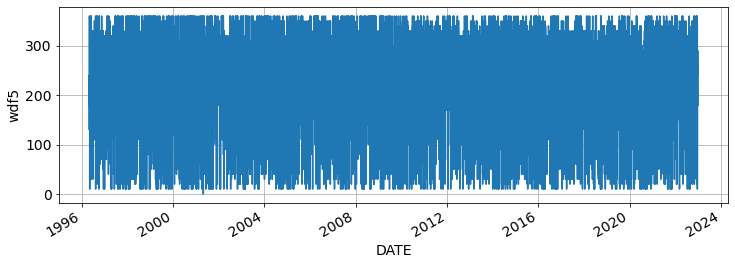

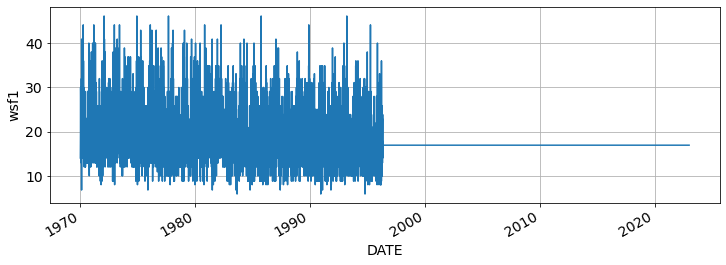

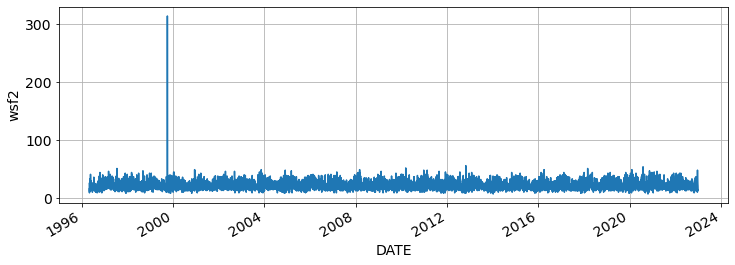

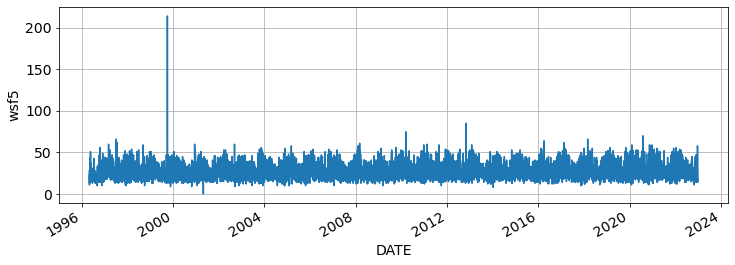

In [66]:
for column in nocb_imputed_df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    nocb_imputed_df[column].plot()
    plt.show()

* The **NOCB** method is not appropriate as null columns still remain.

# LINEAR INTERPOLATION IMPUTATION

In [67]:
linear_interpolation_copy = numimpute.copy()
linear_interpolation_copy['DATE'] = numimpute.index
linear_interpolation_copy.set_index("DATE", inplace=True)
linear_interpolation_copy.head()
linear_interpolation_copy.isnull().mean()

acmh    0.503280
acsh    0.503229
awnd    0.264297
fmtm    0.476985
pgtm    0.366172
wdf1    0.503487
wdf2    0.496875
wdf5    0.501162
wsf1    0.503332
wsf2    0.496875
wsf5    0.501214
dtype: float64

In [68]:
linearinterpolation_imputed_df= linear_interpolation_copy.interpolate(method='linear')

In [69]:
numimpute.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN


In [70]:
linearinterpolation_imputed_df.head()

,acmh,acsh,awnd,fmtm,pgtm,wdf1,wdf2,wdf5,wsf1,wsf2,wsf5
DATE,,,,,,,,,,,
1970-01-01,80.0,90.0,NaN,NaN,NaN,330.0,NaN,NaN,14.1,NaN,NaN
1970-01-02,30.0,20.0,NaN,NaN,NaN,290.0,NaN,NaN,17.9,NaN,NaN
1970-01-03,80.0,100.0,NaN,NaN,NaN,310.0,NaN,NaN,17.0,NaN,NaN
1970-01-04,10.0,20.0,NaN,NaN,NaN,300.0,NaN,NaN,17.9,NaN,NaN
1970-01-05,30.0,10.0,NaN,NaN,NaN,270.0,NaN,NaN,19.9,NaN,NaN


# NOCB and LINEAR INTERPOLATION are not working. start from here

<!-- for column in nocb_imputed_df.columns:
    
    plt.xlabel('Date')
    plt.ylabel(column)
    nocb_imputed_df[column].plot()
    plt.show() -->

In [71]:
# for column in imputed.columns:
#     # #         plot original data
#     plt.plot(numimpute.index, numimpute[column], color="blue", label="Original Data")
#     plt.plot(mean_imputed_df.index, mean_imputed_df[column], 'r-', label="Mean Imputation")
#     plt.plot(median_imputed_df.index, median_imputed_df[column], 'g-', label="Median Imputation")

#     plt.title(column)
#     plt.ylabel(column)
#     plt.legend()
#     plt.show()
    

# df = imputed
# # Identify the columns with null values
# nullcolumns = df.columns[df.isnull().any()]
# # # Identify the columns imputed with the mean
# mean_imputed_columns = df.columns[df.columns.str.contains('mean')]
# # # Identify the columns imputed with the median
# median_imputed_columns = df.columns[df.columns.str.contains('median')]
# # # concatenate all columns
# imputed_columns = pd.concat([null_columns, mean_imputed_columns, median_imputed_columns], axis=0)
# imputed_columns



In [72]:
# # concatenate all columns
# imputed_columns = pd.concat([null_columns, mean_imputed_columns, median_imputed_columns], axis=0)

# # Create an empty figure and axis
# fig, ax = plt.subplots()

# # Define a list of colors and labels
# colors = ['orange','green','blue']
# label = ["Original Data","Mean Imputation","Median Imputation"]

# # Iterate through each column in the "imputed" dataframe
# for i, column in enumerate(imputed_columns):
#     # Plot the data on the axis
#     ax.plot(df.index, df[column], color=colors[i%3], label=label[i%3])

# # Set the title, y-axis label, and legend
# plt.title("Time Series Plot
